Loading HAR70+ Dataset...
Dataset extracted to: har70plus_data

Found 18 CSV files
Loading first file: 501.csv

Dataset Structure:
--------------------
Sample file shape: (103860, 8)
Columns: ['timestamp', 'back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label']

First 5 rows:
                 timestamp    back_x    back_y    back_z   thigh_x   thigh_y  \
0  2021-03-24 14:42:03.839 -0.999023 -0.063477  0.140625 -0.980469 -0.112061   
1  2021-03-24 14:42:03.859 -0.980225 -0.079346  0.140625 -0.961182 -0.121582   
2  2021-03-24 14:42:03.880 -0.950195 -0.076416  0.140625 -0.949463 -0.080566   
3  2021-03-24 14:42:03.900 -0.954834 -0.059082  0.140381 -0.957520 -0.046143   
4  2021-03-24 14:42:03.920 -0.972412 -0.042969  0.142822 -0.977051 -0.023682   

    thigh_z  label  
0 -0.048096      6  
1 -0.051758      6  
2 -0.067139      6  
3 -0.050781      6  
4 -0.026611      6  

Basic Statistics:
              back_x         back_y         back_z        thigh_x  \
count  10386

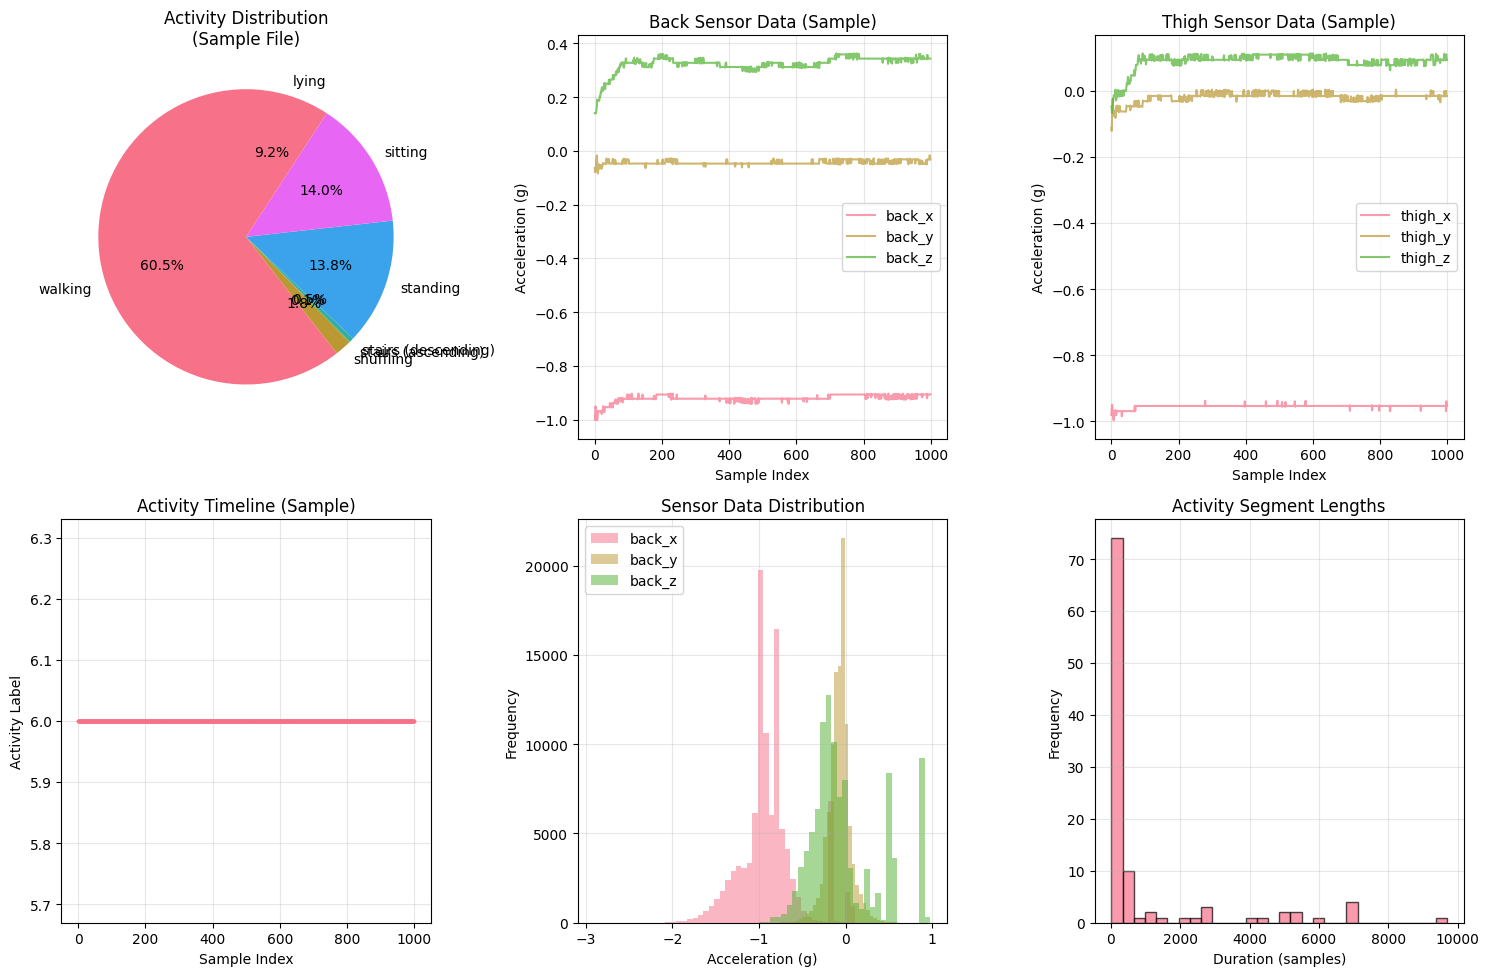


Summary of All Files:
--------------------
File 1: 501.csv
  Shape: (103860, 8)
  Duration: 2077.2 seconds (at 50Hz)
  Activities: {1: 62872, 7: 14562, 6: 14376, 8: 9578, 3: 1876, 5: 504, 4: 92}

File 2: 502.csv
  Shape: (131367, 8)
  Duration: 2627.3 seconds (at 50Hz)
  Activities: {1: 70008, 7: 22780, 6: 20911, 8: 12212, 3: 5300, 5: 156}

File 3: 503.csv
  Shape: (116413, 8)
  Duration: 2328.3 seconds (at 50Hz)
  Activities: {1: 55384, 6: 21341, 7: 18876, 8: 15614, 3: 5198}

File 4: 504.csv
  Shape: (150758, 8)
  Duration: 3015.2 seconds (at 50Hz)
  Activities: {1: 63188, 6: 47534, 7: 29058, 8: 6030, 3: 4562, 4: 202, 5: 184}

File 5: 505.csv
  Shape: (87006, 8)
  Duration: 1740.1 seconds (at 50Hz)
  Activities: {7: 30226, 1: 24314, 6: 17318, 8: 13380, 3: 1768}

Total samples processed: 589,404
Total files available: 18

Aggregated Activity Distribution:
  1: walking - 275,766 samples
  3: shuffling - 18,704 samples
  4: stairs (ascending) - 294 samples
  5: stairs (descending) - 844

In [1]:
# HAR70+ Dataset Loading and Basic Exploration
# Alternative approach: Download and load data directly from UCI repository

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import os
from io import BytesIO

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Loading HAR70+ Dataset...")
print("=" * 50)

# Dataset URL from UCI ML Repository
dataset_url = "https://archive.ics.uci.edu/static/public/780/har70.zip"

def download_and_extract_dataset(url, extract_to="har70plus_data"):
    """Download and extract the HAR70+ dataset"""
    try:
        print("Downloading dataset...")
        response = requests.get(url)
        response.raise_for_status()
        
        # Create extraction directory
        os.makedirs(extract_to, exist_ok=True)
        
        # Extract zip file
        with zipfile.ZipFile(BytesIO(response.content)) as zip_ref:
            zip_ref.extractall(extract_to)
        
        print(f"Dataset extracted to: {extract_to}")
        return extract_to
    except Exception as e:
        print(f"Error downloading dataset: {e}")
        return None

# Download and extract the dataset
data_dir = download_and_extract_dataset(dataset_url)

if data_dir:
    # Find CSV files in the extracted directory
    csv_files = []
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    
    print(f"\nFound {len(csv_files)} CSV files")
    
    if csv_files:
        # Load the first CSV file to explore structure
        first_file = csv_files[0]
        print(f"Loading first file: {os.path.basename(first_file)}")
        
        # Read the first CSV file
        df_sample = pd.read_csv(first_file)
        
        print("\nDataset Structure:")
        print("-" * 20)
        print(f"Sample file shape: {df_sample.shape}")
        print(f"Columns: {list(df_sample.columns)}")
        print()
        
        # Display first few rows
        print("First 5 rows:")
        print(df_sample.head())
        print()
        
        # Display basic statistics
        print("Basic Statistics:")
        print(df_sample.describe())
        print()
        
        # Check data types
        print("Data Types:")
        print(df_sample.dtypes)
        print()
        
        # Activity label mapping (from documentation)
        activity_labels = {
            1: 'walking',
            3: 'shuffling', 
            4: 'stairs (ascending)',
            5: 'stairs (descending)',
            6: 'standing',
            7: 'sitting',
            8: 'lying'
        }
        
        # Analyze activity distribution in sample file
        if 'label' in df_sample.columns:
            print("Activity Distribution in Sample File:")
            print("-" * 20)
            label_counts = df_sample['label'].value_counts().sort_index()
            print("Raw counts:")
            for label, count in label_counts.items():
                activity_name = activity_labels.get(label, f"Unknown ({label})")
                print(f"  {label}: {activity_name} - {count:,} samples ({count/len(df_sample)*100:.1f}%)")
            print()
        
        # Check for missing values
        print("Missing Values:")
        print("-" * 20)
        print(df_sample.isnull().sum())
        print()
        
        # Sensor data exploration
        sensor_cols = [col for col in df_sample.columns if any(x in col.lower() for x in ['back', 'thigh', '_x', '_y', '_z'])]
        print(f"Sensor columns found: {sensor_cols}")
        print()
        
        # Basic visualization
        if len(sensor_cols) >= 6 and 'label' in df_sample.columns:
            print("Creating visualizations...")
            
            plt.figure(figsize=(15, 10))
            
            # Activity distribution
            plt.subplot(2, 3, 1)
            if 'label' in df_sample.columns:
                activity_names = [activity_labels.get(label, f"Unknown ({label})") for label in label_counts.index]
                plt.pie(label_counts.values, labels=activity_names, autopct='%1.1f%%', startangle=90)
                plt.title('Activity Distribution\n(Sample File)')
            
            # Time series plot of sensor data (first 1000 samples)
            sample_size = min(1000, len(df_sample))
            sample_data = df_sample.iloc[:sample_size]
            
            # Back sensor data
            plt.subplot(2, 3, 2)
            back_cols = [col for col in sensor_cols if 'back' in col.lower()]
            for col in back_cols[:3]:  # First 3 back sensor columns
                if col in sample_data.columns:
                    plt.plot(sample_data[col], label=col, alpha=0.7)
            plt.title('Back Sensor Data (Sample)')
            plt.xlabel('Sample Index')
            plt.ylabel('Acceleration (g)')
            plt.legend()
            plt.grid(True, alpha=0.3)
            
            # Thigh sensor data
            plt.subplot(2, 3, 3)
            thigh_cols = [col for col in sensor_cols if 'thigh' in col.lower()]
            for col in thigh_cols[:3]:  # First 3 thigh sensor columns
                if col in sample_data.columns:
                    plt.plot(sample_data[col], label=col, alpha=0.7)
            plt.title('Thigh Sensor Data (Sample)')
            plt.xlabel('Sample Index')
            plt.ylabel('Acceleration (g)')
            plt.legend()
            plt.grid(True, alpha=0.3)
            
            # Activity timeline
            plt.subplot(2, 3, 4)
            if 'label' in sample_data.columns:
                plt.plot(sample_data['label'], 'o-', markersize=2, alpha=0.7)
                plt.title('Activity Timeline (Sample)')
                plt.xlabel('Sample Index')
                plt.ylabel('Activity Label')
                plt.grid(True, alpha=0.3)
            
            # Sensor data distribution
            plt.subplot(2, 3, 5)
            if len(sensor_cols) > 0:
                for col in sensor_cols[:3]:  # First 3 sensor columns
                    if col in df_sample.columns:
                        plt.hist(df_sample[col], alpha=0.5, label=col, bins=50)
                plt.title('Sensor Data Distribution')
                plt.xlabel('Acceleration (g)')
                plt.ylabel('Frequency')
                plt.legend()
                plt.grid(True, alpha=0.3)
            
            # Activity duration analysis
            plt.subplot(2, 3, 6)
            if 'label' in df_sample.columns:
                # Calculate activity durations (consecutive same labels)
                activity_changes = df_sample['label'].diff().fillna(0) != 0
                activity_segments = activity_changes.cumsum()
                segment_lengths = df_sample.groupby(activity_segments).size()
                
                plt.hist(segment_lengths, bins=30, alpha=0.7, edgecolor='black')
                plt.title('Activity Segment Lengths')
                plt.xlabel('Duration (samples)')
                plt.ylabel('Frequency')
                plt.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
        
        # Load and summarize all files
        print("\nSummary of All Files:")
        print("-" * 20)
        total_samples = 0
        all_activities = {}
        
        for i, file_path in enumerate(csv_files[:5]):  # Limit to first 5 files for quick exploration
            try:
                df = pd.read_csv(file_path)
                total_samples += len(df)
                
                print(f"File {i+1}: {os.path.basename(file_path)}")
                print(f"  Shape: {df.shape}")
                print(f"  Duration: {len(df)/50:.1f} seconds (at 50Hz)")
                
                if 'label' in df.columns:
                    file_activities = df['label'].value_counts()
                    print(f"  Activities: {dict(file_activities)}")
                    
                    # Aggregate activity counts
                    for activity, count in file_activities.items():
                        all_activities[activity] = all_activities.get(activity, 0) + count
                
                print()
                
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
        
        print(f"Total samples processed: {total_samples:,}")
        print(f"Total files available: {len(csv_files)}")
        
        if all_activities:
            print("\nAggregated Activity Distribution:")
            for activity, count in sorted(all_activities.items()):
                activity_name = activity_labels.get(activity, f"Unknown ({activity})")
                print(f"  {activity}: {activity_name} - {count:,} samples")
        
        print("\nDataset Information:")
        print("-" * 20)
        print("- Sampling rate: 50Hz")
        print("- Sensors: 2 x 3-axial accelerometers") 
        print("- Locations: Right thigh and lower back")
        print("- Subjects: 18 older adults (70-95 years)")
        print("- Expected total samples: ~2.26M")
        print()
        
        print("Next steps you might consider:")
        print("- Load and combine multiple subject files")
        print("- Analyze temporal patterns in activities")
        print("- Extract features for machine learning")
        print("- Perform activity recognition modeling")
        
    else:
        print("No CSV files found in the extracted dataset")
else:
    print("Failed to download dataset. Please check your internet connection.")
    print("Alternative: Download manually from https://archive.ics.uci.edu/dataset/780/har70")
    print("Then modify the code to load from local directory.")

Loading and Combining HAR70+ Subject Files...
Found 18 CSV files

Loading subject files:
------------------------------
  Subject 501: 103,860 samples,  34.6 min
  Subject 502: 131,367 samples,  43.8 min
  Subject 503: 116,413 samples,  38.8 min
  Subject 504: 150,758 samples,  50.3 min
  Subject 505:  87,006 samples,  29.0 min
  Subject 506: 122,714 samples,  40.9 min
  Subject 507: 120,125 samples,  40.0 min
  Subject 508: 130,494 samples,  43.5 min
  Subject 509: 121,763 samples,  40.6 min
  Subject 510: 122,061 samples,  40.7 min
  Subject 511: 128,063 samples,  42.7 min
  Subject 512: 119,310 samples,  39.8 min
  Subject 513: 123,599 samples,  41.2 min
  Subject 514: 101,510 samples,  33.8 min
  Subject 515: 153,517 samples,  51.2 min
  Subject 516: 138,278 samples,  46.1 min
  Subject 517: 147,045 samples,  49.0 min
  Subject 518: 141,714 samples,  47.2 min

Combining 18 subject files...
Combined dataset shape: (2259597, 11)
Total recording time: 753.2 minutes

COMBINED DATASET A

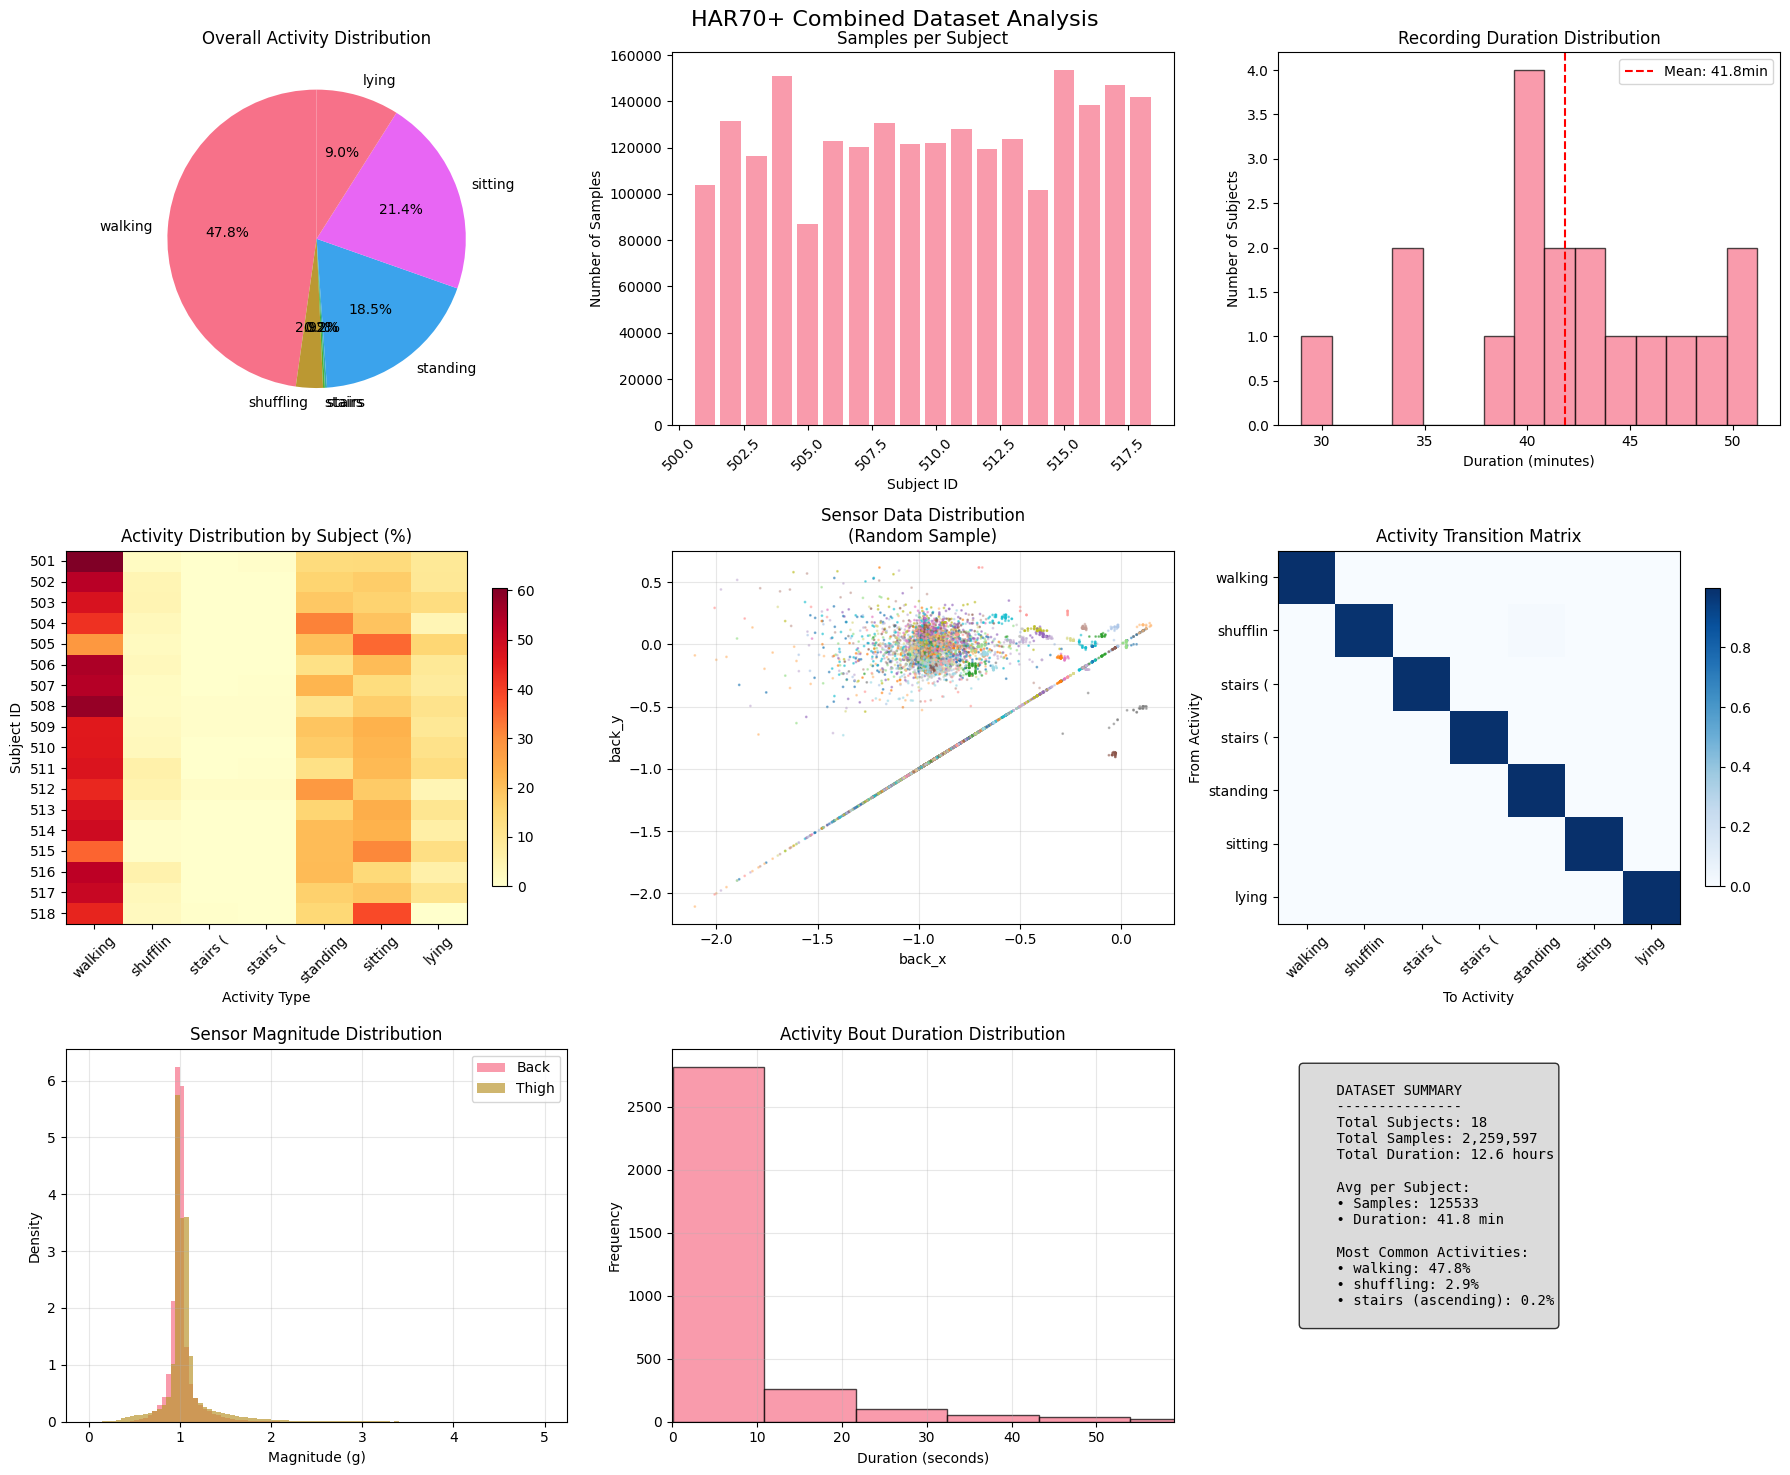


Combined dataset ready for analysis!
Variables available:
- combined_df: Full dataset with 2,259,597 samples
- subject_info_df: Subject metadata with 18 subjects

Next steps you might consider:
- Feature extraction for machine learning
- Time series analysis
- Activity recognition modeling
- Cross-subject validation


In [3]:
# HAR70+ Dataset - Load and Combine Multiple Subject Files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("Loading and Combining HAR70+ Subject Files...")
print("=" * 60)

# Assuming the dataset was already downloaded to 'har70plus_data' directory
data_dir = "har70plus_data"

def load_all_subject_files(data_directory):
    """Load all subject CSV files and combine them into a single dataset"""
    
    # Find all CSV files
    csv_files = []
    for root, dirs, files in os.walk(data_directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    
    print(f"Found {len(csv_files)} CSV files")
    
    if not csv_files:
        print("No CSV files found!")
        return None, None
    
    # Sort files by subject ID (extract number from filename)
    def extract_subject_id(filename):
        import re
        match = re.search(r'(\d+)\.csv$', filename)
        return int(match.group(1)) if match else 0
    
    csv_files.sort(key=lambda x: extract_subject_id(os.path.basename(x)))
    
    # Load and combine all files
    combined_data = []
    subject_info = []
    
    print("\nLoading subject files:")
    print("-" * 30)
    
    for i, file_path in enumerate(csv_files):
        try:
            # Extract subject ID from filename
            subject_id = extract_subject_id(os.path.basename(file_path))
            
            # Load the CSV file
            df = pd.read_csv(file_path)
            
            # Add subject ID column
            df['subject_id'] = subject_id
            
            # Add subject index (0-based for easier indexing)
            df['subject_index'] = i
            
            # Convert timestamp to datetime if it exists
            if 'timestamp' in df.columns:
                try:
                    df['timestamp'] = pd.to_datetime(df['timestamp'])
                    # Add time-based features
                    df['recording_time_seconds'] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds()
                except:
                    print(f"  Warning: Could not parse timestamp for subject {subject_id}")
            
            # Store subject information
            subject_info.append({
                'subject_id': subject_id,
                'subject_index': i,
                'filename': os.path.basename(file_path),
                'num_samples': len(df),
                'duration_minutes': len(df) / 50 / 60,  # Assuming 50Hz sampling
                'activities': df['label'].value_counts().to_dict() if 'label' in df.columns else {},
                'date_range': (df['timestamp'].min(), df['timestamp'].max()) if 'timestamp' in df.columns else None
            })
            
            combined_data.append(df)
            
            print(f"  Subject {subject_id:3d}: {len(df):7,} samples, {len(df)/50/60:5.1f} min")
            
        except Exception as e:
            print(f"  Error loading {file_path}: {e}")
    
    if combined_data:
        # Combine all subject data
        print(f"\nCombining {len(combined_data)} subject files...")
        combined_df = pd.concat(combined_data, ignore_index=True)
        
        # Create subject info DataFrame
        subject_info_df = pd.DataFrame(subject_info)
        
        print(f"Combined dataset shape: {combined_df.shape}")
        print(f"Total recording time: {len(combined_df)/50/60:.1f} minutes")
        
        return combined_df, subject_info_df
    else:
        return None, None

# Load and combine all subject files
combined_df, subject_info_df = load_all_subject_files(data_dir)

if combined_df is not None:
    print("\n" + "=" * 60)
    print("COMBINED DATASET ANALYSIS")
    print("=" * 60)
    
    # Basic dataset information
    print("\nDataset Overview:")
    print("-" * 20)
    print(f"Total samples: {len(combined_df):,}")
    print(f"Total subjects: {combined_df['subject_id'].nunique()}")
    print(f"Total recording time: {len(combined_df)/50/60:.1f} minutes ({len(combined_df)/50/3600:.1f} hours)")
    print(f"Average per subject: {len(combined_df)/combined_df['subject_id'].nunique():.0f} samples")
    print(f"Columns: {list(combined_df.columns)}")
    print()
    
    # Activity label mapping
    activity_labels = {
        1: 'walking',
        3: 'shuffling', 
        4: 'stairs (ascending)',
        5: 'stairs (descending)',
        6: 'standing',
        7: 'sitting',
        8: 'lying'
    }
    
    # Overall activity distribution
    print("Overall Activity Distribution:")
    print("-" * 30)
    if 'label' in combined_df.columns:
        overall_activities = combined_df['label'].value_counts().sort_index()
        total_samples = len(combined_df)
        
        for activity, count in overall_activities.items():
            activity_name = activity_labels.get(activity, f"Unknown ({activity})")
            percentage = count / total_samples * 100
            duration_min = count / 50 / 60  # Convert to minutes
            print(f"  {activity}: {activity_name:20} - {count:8,} samples ({percentage:5.1f}%, {duration_min:6.1f} min)")
    
    print()
    
    # Subject-wise analysis
    print("Subject-wise Summary:")
    print("-" * 20)
    print(subject_info_df[['subject_id', 'num_samples', 'duration_minutes']].describe())
    print()
    
    # Sensor data analysis
    sensor_cols = [col for col in combined_df.columns if any(x in col.lower() for x in ['back', 'thigh'])]
    if sensor_cols:
        print("Sensor Data Summary:")
        print("-" * 20)
        print(combined_df[sensor_cols].describe())
        print()
    
    # Missing values check
    print("Missing Values:")
    print("-" * 15)
    missing_values = combined_df.isnull().sum()
    if missing_values.sum() > 0:
        print(missing_values[missing_values > 0])
    else:
        print("No missing values found!")
    print()
    
    # Memory usage
    print("Memory Usage:")
    print("-" * 15)
    memory_usage = combined_df.memory_usage(deep=True).sum() / 1024**2  # MB
    print(f"Combined dataset: {memory_usage:.1f} MB")
    print()
    
    # Create comprehensive visualizations
    print("Creating visualizations...")
    
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    fig.suptitle('HAR70+ Combined Dataset Analysis', fontsize=16, y=0.98)
    
    # 1. Overall activity distribution
    ax1 = axes[0, 0]
    if 'label' in combined_df.columns:
        activity_names = [activity_labels.get(label, f"Unk({label})") for label in overall_activities.index]
        activity_short_names = [name.split('(')[0][:12] for name in activity_names]  # Truncate for display
        ax1.pie(overall_activities.values, labels=activity_short_names, autopct='%1.1f%%', startangle=90)
        ax1.set_title('Overall Activity Distribution')
    
    # 2. Subject sample counts
    ax2 = axes[0, 1]
    subject_counts = combined_df['subject_id'].value_counts().sort_index()
    ax2.bar(subject_counts.index, subject_counts.values, alpha=0.7)
    ax2.set_title('Samples per Subject')
    ax2.set_xlabel('Subject ID')
    ax2.set_ylabel('Number of Samples')
    ax2.tick_params(axis='x', rotation=45)
    
    # 3. Recording duration per subject
    ax3 = axes[0, 2]
    durations = subject_info_df['duration_minutes'].values
    ax3.hist(durations, bins=15, alpha=0.7, edgecolor='black')
    ax3.set_title('Recording Duration Distribution')
    ax3.set_xlabel('Duration (minutes)')
    ax3.set_ylabel('Number of Subjects')
    ax3.axvline(durations.mean(), color='red', linestyle='--', label=f'Mean: {durations.mean():.1f}min')
    ax3.legend()
    
    # 4. Activity distribution by subject (heatmap)
    ax4 = axes[1, 0]
    if 'label' in combined_df.columns:
        # Create activity matrix (subjects x activities)
        activity_matrix = []
        subject_ids = sorted(combined_df['subject_id'].unique())
        
        for subject_id in subject_ids:
            subject_data = combined_df[combined_df['subject_id'] == subject_id]
            activity_counts = subject_data['label'].value_counts()
            activity_percentages = []
            for activity in sorted(activity_labels.keys()):
                count = activity_counts.get(activity, 0)
                percentage = count / len(subject_data) * 100
                activity_percentages.append(percentage)
            activity_matrix.append(activity_percentages)
        
        activity_matrix = np.array(activity_matrix)
        activity_short_names = [activity_labels[i][:8] for i in sorted(activity_labels.keys())]
        
        im = ax4.imshow(activity_matrix, cmap='YlOrRd', aspect='auto')
        ax4.set_title('Activity Distribution by Subject (%)')
        ax4.set_xlabel('Activity Type')
        ax4.set_ylabel('Subject ID')
        ax4.set_xticks(range(len(activity_short_names)))
        ax4.set_xticklabels(activity_short_names, rotation=45)
        ax4.set_yticks(range(0, len(subject_ids), max(1, len(subject_ids)//10)))
        ax4.set_yticklabels([subject_ids[i] for i in range(0, len(subject_ids), max(1, len(subject_ids)//10))])
        plt.colorbar(im, ax=ax4, shrink=0.8)
    
    # 5. Sample sensor data across subjects
    ax5 = axes[1, 1]
    if len(sensor_cols) >= 2:
        sample_size = min(5000, len(combined_df))
        sample_indices = np.random.choice(len(combined_df), sample_size, replace=False)
        sample_data = combined_df.iloc[sample_indices]
        
        for i, col in enumerate(sensor_cols[:2]):  # First 2 sensor columns
            ax5.scatter(sample_data[sensor_cols[0]], sample_data[col], 
                       c=sample_data['subject_id'], alpha=0.5, s=1, cmap='tab20')
        ax5.set_title('Sensor Data Distribution\n(Random Sample)')
        ax5.set_xlabel(sensor_cols[0] if len(sensor_cols) > 0 else 'Sensor 1')
        ax5.set_ylabel(sensor_cols[1] if len(sensor_cols) > 1 else 'Sensor 2')
        ax5.grid(True, alpha=0.3)
    
    # 6. Activity transition matrix
    ax6 = axes[1, 2]
    if 'label' in combined_df.columns:
        # Calculate transitions (simplified - just consecutive samples)
        transitions = []
        for subject_id in combined_df['subject_id'].unique():
            subject_data = combined_df[combined_df['subject_id'] == subject_id]['label']
            for i in range(len(subject_data) - 1):
                transitions.append((subject_data.iloc[i], subject_data.iloc[i + 1]))
        
        # Create transition matrix
        activities = sorted(activity_labels.keys())
        transition_matrix = np.zeros((len(activities), len(activities)))
        
        for from_activity, to_activity in transitions:
            if from_activity in activities and to_activity in activities:
                from_idx = activities.index(from_activity)
                to_idx = activities.index(to_activity)
                transition_matrix[from_idx, to_idx] += 1
        
        # Normalize by row sums
        row_sums = transition_matrix.sum(axis=1)
        transition_matrix = np.divide(transition_matrix, row_sums[:, np.newaxis], 
                                    out=np.zeros_like(transition_matrix), where=row_sums[:, np.newaxis] != 0)
        
        im = ax6.imshow(transition_matrix, cmap='Blues', aspect='auto')
        ax6.set_title('Activity Transition Matrix')
        ax6.set_xlabel('To Activity')
        ax6.set_ylabel('From Activity')
        activity_short_names = [activity_labels[i][:8] for i in activities]
        ax6.set_xticks(range(len(activities)))
        ax6.set_xticklabels(activity_short_names, rotation=45)
        ax6.set_yticks(range(len(activities)))
        ax6.set_yticklabels(activity_short_names)
        plt.colorbar(im, ax=ax6, shrink=0.8)
    
    # 7. Sensor magnitude distribution
    ax7 = axes[2, 0]
    if len(sensor_cols) >= 6:
        # Calculate sensor magnitudes
        back_cols = [col for col in sensor_cols if 'back' in col.lower()]
        thigh_cols = [col for col in sensor_cols if 'thigh' in col.lower()]
        
        if len(back_cols) >= 3:
            combined_df['back_magnitude'] = np.sqrt(combined_df[back_cols[0]]**2 + 
                                                  combined_df[back_cols[1]]**2 + 
                                                  combined_df[back_cols[2]]**2)
        if len(thigh_cols) >= 3:
            combined_df['thigh_magnitude'] = np.sqrt(combined_df[thigh_cols[0]]**2 + 
                                                   combined_df[thigh_cols[1]]**2 + 
                                                   combined_df[thigh_cols[2]]**2)
        
        if 'back_magnitude' in combined_df.columns:
            ax7.hist(combined_df['back_magnitude'], bins=100, alpha=0.7, 
                    label='Back', density=True, range=(0, 5))
        if 'thigh_magnitude' in combined_df.columns:
            ax7.hist(combined_df['thigh_magnitude'], bins=100, alpha=0.7, 
                    label='Thigh', density=True, range=(0, 5))
        ax7.set_title('Sensor Magnitude Distribution')
        ax7.set_xlabel('Magnitude (g)')
        ax7.set_ylabel('Density')
        ax7.legend()
        ax7.grid(True, alpha=0.3)
    
    # 8. Activity duration distribution
    ax8 = axes[2, 1]
    if 'label' in combined_df.columns:
        # Calculate activity bout lengths
        activity_bouts = []
        for subject_id in combined_df['subject_id'].unique():
            subject_data = combined_df[combined_df['subject_id'] == subject_id]
            labels = subject_data['label'].values
            
            if len(labels) > 0:
                current_activity = labels[0]
                bout_length = 1
                
                for i in range(1, len(labels)):
                    if labels[i] == current_activity:
                        bout_length += 1
                    else:
                        activity_bouts.append(bout_length / 50)  # Convert to seconds
                        current_activity = labels[i]
                        bout_length = 1
                
                activity_bouts.append(bout_length / 50)  # Don't forget the last bout
        
        ax8.hist(activity_bouts, bins=50, alpha=0.7, edgecolor='black')
        ax8.set_title('Activity Bout Duration Distribution')
        ax8.set_xlabel('Duration (seconds)')
        ax8.set_ylabel('Frequency')
        ax8.set_xlim(0, np.percentile(activity_bouts, 95))  # Limit to 95th percentile
        ax8.grid(True, alpha=0.3)
    
    # 9. Subject characteristics summary
    ax9 = axes[2, 2]
    ax9.axis('off')
    
    # Create summary text
    summary_text = f"""
    DATASET SUMMARY
    ---------------
    Total Subjects: {combined_df['subject_id'].nunique()}
    Total Samples: {len(combined_df):,}
    Total Duration: {len(combined_df)/50/3600:.1f} hours
    
    Avg per Subject:
    • Samples: {len(combined_df)/combined_df['subject_id'].nunique():.0f}
    • Duration: {len(combined_df)/50/60/combined_df['subject_id'].nunique():.1f} min
    
    Most Common Activities:
    """
    
    if 'label' in combined_df.columns:
        top_activities = overall_activities.head(3)
        for activity, count in top_activities.items():
            activity_name = activity_labels.get(activity, f"Unknown ({activity})")
            percentage = count / len(combined_df) * 100
            summary_text += f"• {activity_name}: {percentage:.1f}%\n    "
    
    ax9.text(0.05, 0.95, summary_text, transform=ax9.transAxes, fontsize=10,
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    print("\nCombined dataset ready for analysis!")
    print("Variables available:")
    print(f"- combined_df: Full dataset with {len(combined_df):,} samples")
    print(f"- subject_info_df: Subject metadata with {len(subject_info_df)} subjects")
    print("\nNext steps you might consider:")
    print("- Feature extraction for machine learning")
    print("- Time series analysis")
    print("- Activity recognition modeling")
    print("- Cross-subject validation")
    
else:
    print("Failed to load dataset files. Please ensure the data directory exists.")

HAR70+ Feature Extraction for Machine Learning

Starting feature extraction pipeline...
Available columns: ['timestamp', 'back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label', 'subject_id', 'subject_index', 'recording_time_seconds', 'back_magnitude', 'thigh_magnitude']

Creating sliding windows:
  Window size: 100 samples (2.0 seconds)
  Overlap: 50%
  Created 42972 windows
  Label distribution:
    1: walking - 20976 windows (48.8%)
    3: shuffling - 704 windows (1.6%)
    4: stairs (ascending) - 75 windows (0.2%)
    5: stairs (descending) - 82 windows (0.2%)
    6: standing - 7472 windows (17.4%)
    7: sitting - 9615 windows (22.4%)
    8: lying - 4048 windows (9.4%)

Extracting features...
Extracting features from 42972 windows...
  Processing window 1/42972
  Processing window 1001/42972
  Processing window 2001/42972
  Processing window 3001/42972
  Processing window 4001/42972
  Processing window 5001/42972
  Processing window 6001/42972
  Processing window 70

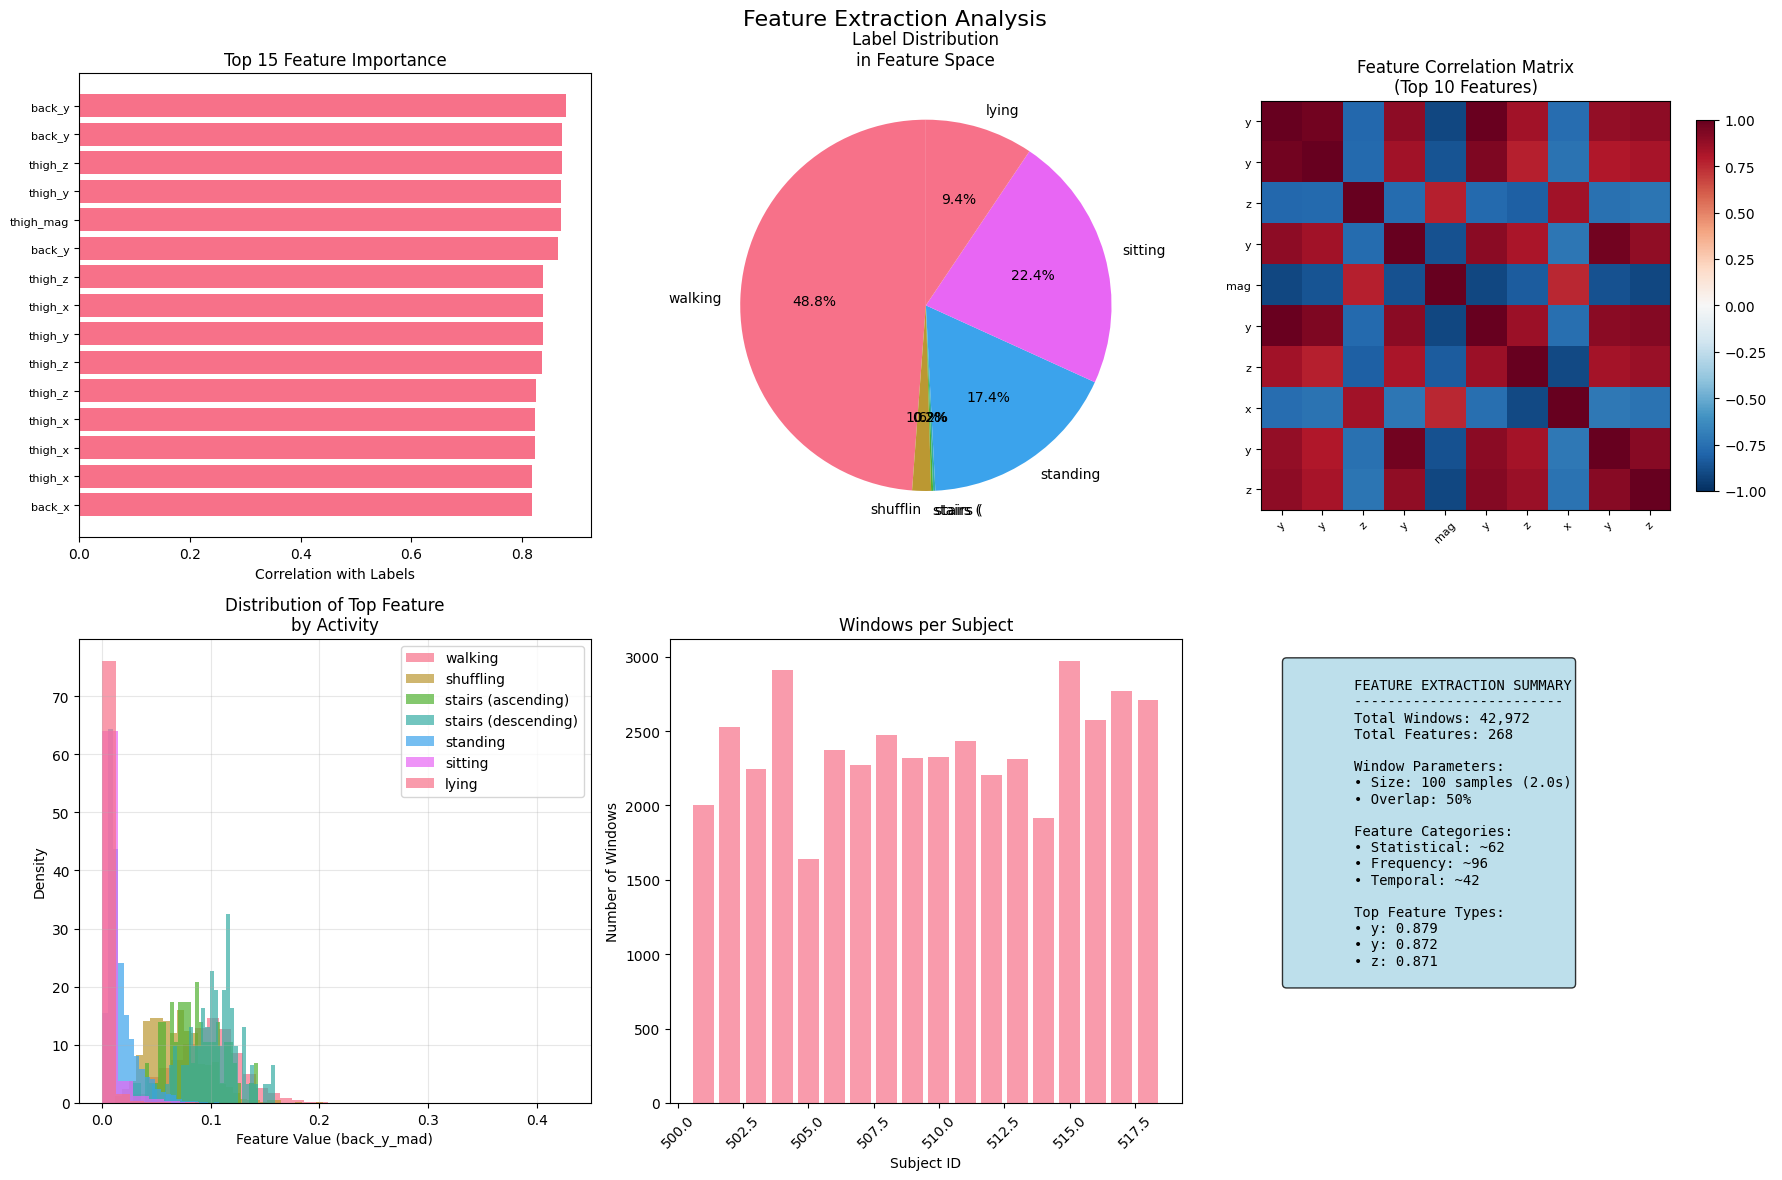


Preparing data for machine learning...
Label encoding mapping:
  1 (walking) -> 0
  3 (shuffling) -> 1
  4 (stairs (ascending)) -> 2
  5 (stairs (descending)) -> 3
  6 (standing) -> 4
  7 (sitting) -> 5
  8 (lying) -> 6

Creating train/test split (subject-wise)...
  Training set: 33750 samples from 14 subjects
  Test set: 9222 samples from 4 subjects

Standardizing features...
Feature extraction pipeline complete!

Available variables for ML:
- X_train, X_test: Raw features
- X_train_scaled, X_test_scaled: Standardized features
- y_train, y_test: Encoded labels
- scaler: Fitted StandardScaler
- label_encoder: Fitted LabelEncoder
- feature_columns: List of feature names


In [4]:
# HAR70+ Dataset - Feature Extraction for Machine Learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks, welch
from scipy.fft import fft, fftfreq
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print("HAR70+ Feature Extraction for Machine Learning")
print("=" * 60)

# Assuming combined_df is available from previous code
# If not, uncomment and modify the path below:
# combined_df = pd.read_csv('path_to_combined_dataset.csv')

def extract_statistical_features(signal, prefix=""):
    """Extract statistical features from a signal"""
    features = {}
    
    # Basic statistics
    features[f'{prefix}mean'] = np.mean(signal)
    features[f'{prefix}std'] = np.std(signal)
    features[f'{prefix}var'] = np.var(signal)
    features[f'{prefix}min'] = np.min(signal)
    features[f'{prefix}max'] = np.max(signal)
    features[f'{prefix}range'] = np.max(signal) - np.min(signal)
    features[f'{prefix}median'] = np.median(signal)
    
    # Percentiles
    features[f'{prefix}q25'] = np.percentile(signal, 25)
    features[f'{prefix}q75'] = np.percentile(signal, 75)
    features[f'{prefix}iqr'] = np.percentile(signal, 75) - np.percentile(signal, 25)
    
    # Higher-order statistics
    features[f'{prefix}skewness'] = stats.skew(signal)
    features[f'{prefix}kurtosis'] = stats.kurtosis(signal)
    
    # Zero crossings
    zero_crossings = np.where(np.diff(np.sign(signal)))[0]
    features[f'{prefix}zero_crossings'] = len(zero_crossings)
    features[f'{prefix}zero_crossing_rate'] = len(zero_crossings) / len(signal)
    
    # Root mean square
    features[f'{prefix}rms'] = np.sqrt(np.mean(signal**2))
    
    # Mean absolute deviation
    features[f'{prefix}mad'] = np.mean(np.abs(signal - np.mean(signal)))
    
    return features

def extract_frequency_features(signal, sampling_rate=50, prefix=""):
    """Extract frequency domain features from a signal"""
    features = {}
    
    # FFT
    fft_values = fft(signal)
    fft_magnitude = np.abs(fft_values)
    freqs = fftfreq(len(signal), 1/sampling_rate)
    
    # Only use positive frequencies
    positive_freqs = freqs[:len(freqs)//2]
    positive_fft = fft_magnitude[:len(fft_magnitude)//2]
    
    # Power spectral density
    frequencies, psd = welch(signal, fs=sampling_rate, nperseg=min(256, len(signal)//4))
    
    # Spectral features
    features[f'{prefix}spectral_centroid'] = np.sum(frequencies * psd) / np.sum(psd)
    features[f'{prefix}spectral_rolloff'] = frequencies[np.where(np.cumsum(psd) >= 0.85 * np.sum(psd))[0][0]]
    features[f'{prefix}spectral_bandwidth'] = np.sqrt(np.sum(((frequencies - features[f'{prefix}spectral_centroid'])**2) * psd) / np.sum(psd))
    
    # Dominant frequency
    dominant_freq_idx = np.argmax(positive_fft)
    features[f'{prefix}dominant_frequency'] = positive_freqs[dominant_freq_idx]
    features[f'{prefix}dominant_frequency_magnitude'] = positive_fft[dominant_freq_idx]
    
    # Energy in different frequency bands
    features[f'{prefix}energy_0_5hz'] = np.sum(psd[(frequencies >= 0) & (frequencies < 0.5)])
    features[f'{prefix}energy_0_5_2hz'] = np.sum(psd[(frequencies >= 0.5) & (frequencies < 2)])
    features[f'{prefix}energy_2_5hz'] = np.sum(psd[(frequencies >= 2) & (frequencies < 5)])
    features[f'{prefix}energy_5_10hz'] = np.sum(psd[(frequencies >= 5) & (frequencies < 10)])
    features[f'{prefix}energy_10_25hz'] = np.sum(psd[(frequencies >= 10) & (frequencies < 25)])
    
    # Total energy
    total_energy = np.sum(psd)
    features[f'{prefix}total_energy'] = total_energy
    
    # Normalized energy in bands
    if total_energy > 0:
        features[f'{prefix}energy_0_5hz_norm'] = features[f'{prefix}energy_0_5hz'] / total_energy
        features[f'{prefix}energy_0_5_2hz_norm'] = features[f'{prefix}energy_0_5_2hz'] / total_energy
        features[f'{prefix}energy_2_5hz_norm'] = features[f'{prefix}energy_2_5hz'] / total_energy
        features[f'{prefix}energy_5_10hz_norm'] = features[f'{prefix}energy_5_10hz'] / total_energy
        features[f'{prefix}energy_10_25hz_norm'] = features[f'{prefix}energy_10_25hz'] / total_energy
    
    return features

def extract_temporal_features(signal, prefix=""):
    """Extract temporal/time-domain features"""
    features = {}
    
    # Signal magnitude area
    features[f'{prefix}sma'] = np.sum(np.abs(signal))
    
    # Autocorrelation features
    autocorr = np.correlate(signal, signal, mode='full')
    autocorr = autocorr[len(autocorr)//2:]
    autocorr = autocorr / autocorr[0]  # Normalize
    
    # Find first minimum in autocorrelation (potential periodicity)
    if len(autocorr) > 1:
        peaks, _ = find_peaks(-autocorr[1:])  # Find valleys (negative peaks)
        if len(peaks) > 0:
            features[f'{prefix}autocorr_first_min'] = peaks[0] + 1
        else:
            features[f'{prefix}autocorr_first_min'] = len(autocorr)
    
    # Signal vector magnitude
    features[f'{prefix}magnitude'] = np.sqrt(np.sum(signal**2))
    
    # Peak detection
    peaks, _ = find_peaks(signal, height=np.std(signal))
    features[f'{prefix}num_peaks'] = len(peaks)
    features[f'{prefix}peak_rate'] = len(peaks) / len(signal)
    
    if len(peaks) > 1:
        peak_intervals = np.diff(peaks)
        features[f'{prefix}peak_interval_mean'] = np.mean(peak_intervals)
        features[f'{prefix}peak_interval_std'] = np.std(peak_intervals)
    else:
        features[f'{prefix}peak_interval_mean'] = 0
        features[f'{prefix}peak_interval_std'] = 0
    
    return features

def create_sliding_windows(data, window_size, overlap=0.5):
    """Create sliding windows from time series data"""
    step_size = int(window_size * (1 - overlap))
    windows = []
    labels = []
    subjects = []
    
    # Group by subject to maintain subject boundaries
    for subject_id in data['subject_id'].unique():
        subject_data = data[data['subject_id'] == subject_id].reset_index(drop=True)
        
        for i in range(0, len(subject_data) - window_size + 1, step_size):
            window = subject_data.iloc[i:i + window_size]
            
            # Check if window has consistent label (majority voting)
            window_labels = window['label'].values
            unique_labels, counts = np.unique(window_labels, return_counts=True)
            majority_label = unique_labels[np.argmax(counts)]
            
            # Only use windows where majority label represents >70% of the window
            if np.max(counts) / len(window_labels) >= 0.7:
                windows.append(window)
                labels.append(majority_label)
                subjects.append(subject_id)
    
    return windows, labels, subjects

def extract_features_from_windows(windows, labels, subjects):
    """Extract features from all windows"""
    feature_list = []
    
    # Define sensor columns
    sensor_columns = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
    
    print(f"Extracting features from {len(windows)} windows...")
    
    for i, window in enumerate(windows):
        if i % 1000 == 0:
            print(f"  Processing window {i+1}/{len(windows)}")
        
        window_features = {}
        
        # Extract features for each sensor axis
        for col in sensor_columns:
            if col in window.columns:
                signal = window[col].values
                
                # Statistical features
                stat_features = extract_statistical_features(signal, prefix=f"{col}_")
                window_features.update(stat_features)
                
                # Frequency features
                freq_features = extract_frequency_features(signal, prefix=f"{col}_")
                window_features.update(freq_features)
                
                # Temporal features
                temp_features = extract_temporal_features(signal, prefix=f"{col}_")
                window_features.update(temp_features)
        
        # Cross-axis features
        if all(col in window.columns for col in sensor_columns):
            # Compute magnitudes
            back_magnitude = np.sqrt(window['back_x']**2 + window['back_y']**2 + window['back_z']**2)
            thigh_magnitude = np.sqrt(window['thigh_x']**2 + window['thigh_y']**2 + window['thigh_z']**2)
            
            # Extract features from magnitudes
            back_mag_features = extract_statistical_features(back_magnitude, prefix="back_mag_")
            thigh_mag_features = extract_statistical_features(thigh_magnitude, prefix="thigh_mag_")
            window_features.update(back_mag_features)
            window_features.update(thigh_mag_features)
            
            # Cross-correlation between sensors
            back_signals = window[['back_x', 'back_y', 'back_z']].values
            thigh_signals = window[['thigh_x', 'thigh_y', 'thigh_z']].values
            
            # Correlation between back and thigh magnitudes
            correlation = np.corrcoef(back_magnitude, thigh_magnitude)[0, 1]
            window_features['back_thigh_correlation'] = correlation if not np.isnan(correlation) else 0
            
            # Angle between sensor vectors (simplified)
            back_mean = np.mean(back_signals, axis=0)
            thigh_mean = np.mean(thigh_signals, axis=0)
            cos_angle = np.dot(back_mean, thigh_mean) / (np.linalg.norm(back_mean) * np.linalg.norm(thigh_mean))
            window_features['sensor_angle'] = np.arccos(np.clip(cos_angle, -1, 1))
        
        # Add metadata
        window_features['subject_id'] = subjects[i]
        window_features['label'] = labels[i]
        
        feature_list.append(window_features)
    
    return pd.DataFrame(feature_list)

# Main feature extraction pipeline
if 'combined_df' in locals():
    print("\nStarting feature extraction pipeline...")
    
    # Check available columns
    print("Available columns:", list(combined_df.columns))
    
    # Verify we have the required sensor columns
    required_columns = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label', 'subject_id']
    missing_columns = [col for col in required_columns if col not in combined_df.columns]
    
    if missing_columns:
        print(f"Missing required columns: {missing_columns}")
        print("Please ensure the dataset has been loaded correctly.")
    else:
        # Parameters
        WINDOW_SIZE = 100  # 2 seconds at 50Hz
        OVERLAP = 0.5      # 50% overlap
        
        print(f"\nCreating sliding windows:")
        print(f"  Window size: {WINDOW_SIZE} samples ({WINDOW_SIZE/50:.1f} seconds)")
        print(f"  Overlap: {OVERLAP*100:.0f}%")
        
        # Create sliding windows
        windows, labels, subjects = create_sliding_windows(combined_df, WINDOW_SIZE, OVERLAP)
        
        print(f"  Created {len(windows)} windows")
        print(f"  Label distribution:")
        
        # Activity label mapping
        activity_labels = {
            1: 'walking',
            3: 'shuffling', 
            4: 'stairs (ascending)',
            5: 'stairs (descending)',
            6: 'standing',
            7: 'sitting',
            8: 'lying'
        }
        
        unique_labels, counts = np.unique(labels, return_counts=True)
        for label, count in zip(unique_labels, counts):
            activity_name = activity_labels.get(label, f"Unknown ({label})")
            print(f"    {label}: {activity_name} - {count} windows ({count/len(labels)*100:.1f}%)")
        
        # Extract features
        print("\nExtracting features...")
        features_df = extract_features_from_windows(windows, labels, subjects)
        
        print(f"\nFeature extraction complete!")
        print(f"  Feature matrix shape: {features_df.shape}")
        print(f"  Number of features: {features_df.shape[1] - 2}")  # Exclude subject_id and label
        
        # Separate features and labels
        feature_columns = [col for col in features_df.columns if col not in ['subject_id', 'label']]
        X = features_df[feature_columns]
        y = features_df['label']
        subjects_array = features_df['subject_id']
        
        print(f"  Feature columns: {len(feature_columns)}")
        print(f"  Samples: {len(X)}")
        
        # Handle missing values
        print("\nHandling missing values...")
        missing_before = X.isnull().sum().sum()
        X = X.fillna(X.median())  # Fill with median
        missing_after = X.isnull().sum().sum()
        print(f"  Missing values before: {missing_before}")
        print(f"  Missing values after: {missing_after}")
        
        # Feature analysis
        print("\nFeature Analysis:")
        print("-" * 20)
        
        # Feature importance (correlation with labels)
        feature_importance = []
        for feature in feature_columns:
            correlation = np.corrcoef(X[feature], y)[0, 1]
            if not np.isnan(correlation):
                feature_importance.append((feature, abs(correlation)))
        
        # Sort by importance
        feature_importance.sort(key=lambda x: x[1], reverse=True)
        
        print("Top 10 most important features (by correlation with labels):")
        for i, (feature, importance) in enumerate(feature_importance[:10]):
            print(f"  {i+1:2d}. {feature}: {importance:.3f}")
        
        # Create visualizations
        print("\nCreating feature analysis visualizations...")
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Feature Extraction Analysis', fontsize=16)
        
        # 1. Feature importance
        ax1 = axes[0, 0]
        top_features = feature_importance[:15]
        feature_names = [f.split('_')[0] + '_' + f.split('_')[1] for f, _ in top_features]  # Shorten names
        importance_values = [imp for _, imp in top_features]
        
        ax1.barh(range(len(top_features)), importance_values)
        ax1.set_yticks(range(len(top_features)))
        ax1.set_yticklabels(feature_names, fontsize=8)
        ax1.set_xlabel('Correlation with Labels')
        ax1.set_title('Top 15 Feature Importance')
        ax1.invert_yaxis()
        
        # 2. Label distribution in feature space
        ax2 = axes[0, 1]
        label_counts = pd.Series(y).value_counts().sort_index()
        activity_names = [activity_labels.get(label, f"Unk({label})") for label in label_counts.index]
        activity_short = [name[:8] for name in activity_names]
        
        ax2.pie(label_counts.values, labels=activity_short, autopct='%1.1f%%', startangle=90)
        ax2.set_title('Label Distribution\nin Feature Space')
        
        # 3. Feature correlation matrix (sample)
        ax3 = axes[0, 2]
        sample_features = [f for f, _ in feature_importance[:10]]
        corr_matrix = X[sample_features].corr()
        
        im = ax3.imshow(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1)
        ax3.set_xticks(range(len(sample_features)))
        ax3.set_yticks(range(len(sample_features)))
        ax3.set_xticklabels([f.split('_')[1] for f in sample_features], rotation=45, fontsize=8)
        ax3.set_yticklabels([f.split('_')[1] for f in sample_features], fontsize=8)
        ax3.set_title('Feature Correlation Matrix\n(Top 10 Features)')
        plt.colorbar(im, ax=ax3, shrink=0.8)
        
        # 4. Feature distribution by activity
        ax4 = axes[1, 0]
        top_feature = feature_importance[0][0]
        
        for label in unique_labels:
            feature_values = X[y == label][top_feature]
            activity_name = activity_labels.get(label, f"Unk({label})")
            ax4.hist(feature_values, alpha=0.7, label=activity_name, bins=30, density=True)
        
        ax4.set_xlabel(f'Feature Value ({top_feature})')
        ax4.set_ylabel('Density')
        ax4.set_title(f'Distribution of Top Feature\nby Activity')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        # 5. Subject distribution
        ax5 = axes[1, 1]
        subject_counts = pd.Series(subjects_array).value_counts().sort_index()
        ax5.bar(subject_counts.index, subject_counts.values, alpha=0.7)
        ax5.set_xlabel('Subject ID')
        ax5.set_ylabel('Number of Windows')
        ax5.set_title('Windows per Subject')
        ax5.tick_params(axis='x', rotation=45)
        
        # 6. Feature statistics summary
        ax6 = axes[1, 2]
        ax6.axis('off')
        
        # Create summary text
        summary_text = f"""
        FEATURE EXTRACTION SUMMARY
        -------------------------
        Total Windows: {len(X):,}
        Total Features: {len(feature_columns)}
        
        Window Parameters:
        • Size: {WINDOW_SIZE} samples ({WINDOW_SIZE/50:.1f}s)
        • Overlap: {OVERLAP*100:.0f}%
        
        Feature Categories:
        • Statistical: ~{len([f for f in feature_columns if any(stat in f for stat in ['mean', 'std', 'min', 'max'])])}
        • Frequency: ~{len([f for f in feature_columns if any(freq in f for freq in ['spectral', 'energy', 'frequency'])])}
        • Temporal: ~{len([f for f in feature_columns if any(temp in f for temp in ['peak', 'autocorr', 'magnitude'])])}
        
        Top Feature Types:
        • {feature_importance[0][0].split('_')[1]}: {feature_importance[0][1]:.3f}
        • {feature_importance[1][0].split('_')[1]}: {feature_importance[1][1]:.3f}
        • {feature_importance[2][0].split('_')[1]}: {feature_importance[2][1]:.3f}
        """
        
        ax6.text(0.05, 0.95, summary_text, transform=ax6.transAxes, fontsize=10,
                verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))
        
        plt.tight_layout()
        plt.show()
        
        # Prepare data for machine learning
        print("\nPreparing data for machine learning...")
        
        # Encode labels
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y)
        
        # Create label mapping
        label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
        print("Label encoding mapping:")
        for original, encoded in label_mapping.items():
            activity_name = activity_labels.get(original, f"Unknown ({original})")
            print(f"  {original} ({activity_name}) -> {encoded}")
        
        # Split data (subject-wise split to avoid data leakage)
        print("\nCreating train/test split (subject-wise)...")
        
        unique_subjects = np.unique(subjects_array)
        train_subjects, test_subjects = train_test_split(unique_subjects, test_size=0.2, random_state=42)
        
        train_mask = pd.Series(subjects_array).isin(train_subjects)
        test_mask = pd.Series(subjects_array).isin(test_subjects)
        
        X_train = X[train_mask]
        X_test = X[test_mask]
        y_train = y_encoded[train_mask]
        y_test = y_encoded[test_mask]
        
        print(f"  Training set: {len(X_train)} samples from {len(train_subjects)} subjects")
        print(f"  Test set: {len(X_test)} samples from {len(test_subjects)} subjects")
        
        # Standardize features
        print("\nStandardizing features...")
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        print("Feature extraction pipeline complete!")
        print("\nAvailable variables for ML:")
        print("- X_train, X_test: Raw features")
        print("- X_train_scaled, X_test_scaled: Standardized features")
        print("- y_train, y_test: Encoded labels")
        print("- scaler: Fitted StandardScaler")
        print("- label_encoder: Fitted LabelEncoder")
        print("- feature_columns: List of feature names")
        
else:
    print("Error: 'combined_df' not found. Please run the data loading code first.")

HAR70+ Activity Recognition Modeling
Found preprocessed data. Starting modeling pipeline...

Dataset Information:
  Training samples: 33750
  Test samples: 9222
  Features: 268
  Classes: 7
  Class distribution (test set):
    walking: 5032 (54.6%)
    shuffling: 151 (1.6%)
    stairs (ascending): 15 (0.2%)
    stairs (descending): 23 (0.2%)
    standing: 1321 (14.3%)
    sitting: 1796 (19.5%)
    lying: 884 (9.6%)

MODEL EVALUATION

Evaluating Random Forest...
  Accuracy: 0.9201
  F1-Score: 0.9148
  Training time: 5.65s
  Prediction time: 0.0410s

Evaluating Gradient Boosting...
  Accuracy: 0.8852
  F1-Score: 0.8983
  Training time: 2309.93s
  Prediction time: 0.1070s

Evaluating SVM (RBF)...
  Accuracy: 0.9119
  F1-Score: 0.9092
  Training time: 49.95s
  Prediction time: 2.2826s

Evaluating Logistic Regression...
  Accuracy: 0.9167
  F1-Score: 0.9161
  Training time: 1.09s
  Prediction time: 0.0040s

Evaluating K-Nearest Neighbors...
  Accuracy: 0.9216
  F1-Score: 0.9172
  Training t

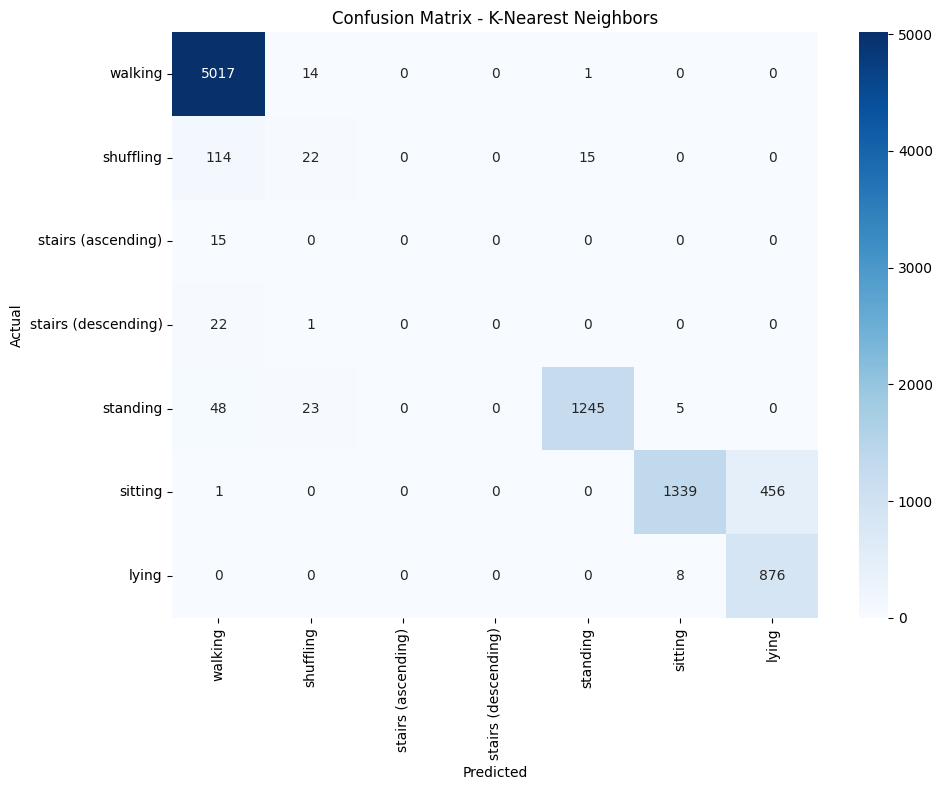


CROSS-VALIDATION ANALYSIS

K-Nearest Neighbors:
  CV F1-Score: 0.9721 (±0.0003)
  CV Scores: [0.97167711 0.97229271 0.97214322 0.97251017 0.97197688]

Neural Network:
  CV F1-Score: 0.9822 (±0.0017)
  CV Scores: [0.98061017 0.98138659 0.98262543 0.98524939 0.98112964]

Logistic Regression:
  CV F1-Score: 0.9807 (±0.0011)
  CV Scores: [0.98146179 0.97856847 0.98135222 0.98122411 0.98079572]

FEATURE SELECTION EXPERIMENTS

Testing with 20 features...

Performing univariate feature selection (k=20)...
  Original features: 268
  Selected features: 20


NameError: name 'f1_score' is not defined

In [4]:
# HAR70+ Activity Recognition Modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                           precision_recall_fscore_support, roc_auc_score, roc_curve)
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import time
import warnings
warnings.filterwarnings('ignore')

print("HAR70+ Activity Recognition Modeling")
print("=" * 60)

# Assuming variables from previous feature extraction are available:
# X_train_scaled, X_test_scaled, y_train, y_test, label_encoder, feature_columns

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Comprehensive model evaluation"""
    print(f"\nEvaluating {model_name}...")
    
    # Training
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Predictions
    start_time = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start_time
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    # Multi-class ROC AUC
    try:
        y_pred_proba = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
    except:
        roc_auc = None
    
    results = {
        'model': model,
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'train_time': train_time,
        'pred_time': pred_time,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba if 'y_pred_proba' in locals() else None
    }
    
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  Training time: {train_time:.2f}s")
    print(f"  Prediction time: {pred_time:.4f}s")
    
    return results

def plot_confusion_matrix(y_true, y_pred, labels, title):
    """Plot confusion matrix"""
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

def plot_roc_curves(results_list, y_test):
    """Plot ROC curves for models that support probability predictions"""
    plt.figure(figsize=(12, 8))
    
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink']
    
    for i, results in enumerate(results_list):
        if results['y_pred_proba'] is not None:
            model_name = results['model_name']
            y_pred_proba = results['y_pred_proba']
            
            # For multi-class, plot ROC for each class
            n_classes = y_pred_proba.shape[1]
            
            # Plot micro-average ROC curve
            y_test_bin = np.zeros((len(y_test), n_classes))
            for j in range(len(y_test)):
                y_test_bin[j, y_test[j]] = 1
            
            from sklearn.metrics import roc_curve, auc
            fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
            roc_auc = auc(fpr, tpr)
            
            plt.plot(fpr, tpr, color=colors[i % len(colors)], 
                    label=f'{model_name} (AUC = {roc_auc:.3f})')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves - Multi-class (Micro-average)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def perform_feature_selection(X_train, y_train, X_test, method='univariate', k=50):
    """Perform feature selection"""
    print(f"\nPerforming {method} feature selection (k={k})...")
    
    if method == 'univariate':
        selector = SelectKBest(score_func=f_classif, k=k)
    elif method == 'rfe':
        estimator = RandomForestClassifier(n_estimators=100, random_state=42)
        selector = RFE(estimator=estimator, n_features_to_select=k)
    else:
        raise ValueError("Method must be 'univariate' or 'rfe'")
    
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    print(f"  Original features: {X_train.shape[1]}")
    print(f"  Selected features: {X_train_selected.shape[1]}")
    
    return X_train_selected, X_test_selected, selector

def hyperparameter_tuning(X_train, y_train, model_type='rf'):
    """Perform hyperparameter tuning"""
    print(f"\nPerforming hyperparameter tuning for {model_type}...")
    
    if model_type == 'rf':
        model = RandomForestClassifier(random_state=42)
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    elif model_type == 'svm':
        model = SVC(random_state=42)
        param_grid = {
            'C': [0.1, 1, 10, 100],
            'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
            'kernel': ['rbf', 'poly', 'sigmoid']
        }
    elif model_type == 'gb':
        model = GradientBoostingClassifier(random_state=42)
        param_grid = {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0]
        }
    else:
        raise ValueError("Model type must be 'rf', 'svm', or 'gb'")
    
    # Use stratified k-fold cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Perform grid search
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='f1_weighted', 
                              n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    print(f"  Best parameters: {grid_search.best_params_}")
    print(f"  Best cross-validation score: {grid_search.best_score_:.4f}")
    
    return grid_search.best_estimator_

# Check if required variables are available
if 'X_train_scaled' in locals() and 'X_test_scaled' in locals():
    print("Found preprocessed data. Starting modeling pipeline...")
    
    # Activity label mapping for display
    activity_labels = {
        1: 'walking',
        3: 'shuffling', 
        4: 'stairs (ascending)',
        5: 'stairs (descending)',
        6: 'standing',
        7: 'sitting',
        8: 'lying'
    }
    
    # Get activity names for display
    unique_labels = np.unique(y_test)
    activity_names = []
    for label in unique_labels:
        original_label = label_encoder.inverse_transform([label])[0]
        activity_name = activity_labels.get(original_label, f"Unknown ({original_label})")
        activity_names.append(activity_name)
    
    print(f"\nDataset Information:")
    print(f"  Training samples: {len(X_train_scaled)}")
    print(f"  Test samples: {len(X_test_scaled)}")
    print(f"  Features: {X_train_scaled.shape[1]}")
    print(f"  Classes: {len(unique_labels)}")
    print(f"  Class distribution (test set):")
    
    test_class_dist = pd.Series(y_test).value_counts().sort_index()
    for label, count in test_class_dist.items():
        original_label = label_encoder.inverse_transform([label])[0]
        activity_name = activity_labels.get(original_label, f"Unknown ({original_label})")
        print(f"    {activity_name}: {count} ({count/len(y_test)*100:.1f}%)")
    
    # Initialize models
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, random_state=42),
        'SVM (RBF)': SVC(kernel='rbf', random_state=42, probability=True),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes': GaussianNB(),
        'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42, max_iter=500)
    }
    
    # Evaluate all models
    print("\n" + "="*60)
    print("MODEL EVALUATION")
    print("="*60)
    
    results_list = []
    for name, model in models.items():
        results = evaluate_model(model, X_train_scaled, X_test_scaled, 
                               y_train, y_test, name)
        results_list.append(results)
    
    # Create results summary
    results_df = pd.DataFrame([
        {
            'Model': r['model_name'],
            'Accuracy': r['accuracy'],
            'Precision': r['precision'],
            'Recall': r['recall'],
            'F1-Score': r['f1_score'],
            'ROC-AUC': r['roc_auc'] if r['roc_auc'] else 'N/A',
            'Train Time (s)': r['train_time'],
            'Pred Time (s)': r['pred_time']
        }
        for r in results_list
    ])
    
    print("\n" + "="*60)
    print("RESULTS SUMMARY")
    print("="*60)
    print(results_df.to_string(index=False))
    
    # Find best model
    best_model_idx = np.argmax([r['f1_score'] for r in results_list])
    best_model_results = results_list[best_model_idx]
    
    print(f"\nBest Model: {best_model_results['model_name']}")
    print(f"Best F1-Score: {best_model_results['f1_score']:.4f}")
    
    # Detailed analysis of best model
    print("\n" + "="*60)
    print(f"DETAILED ANALYSIS - {best_model_results['model_name']}")
    print("="*60)
    
    best_model = best_model_results['model']
    y_pred_best = best_model_results['y_pred']
    
    # Classification report
    print("\nClassification Report:")
    print("-" * 40)
    print(classification_report(y_test, y_pred_best, target_names=activity_names))
    
    # Confusion matrix
    plot_confusion_matrix(y_test, y_pred_best, activity_names, 
                         best_model_results['model_name'])
    
    # Feature importance (if available)
    if hasattr(best_model, 'feature_importances_'):
        print("\nTop 20 Feature Importances:")
        print("-" * 40)
        feature_importance = pd.DataFrame({
            'feature': feature_columns,
            'importance': best_model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print(feature_importance.head(20).to_string(index=False))
        
        # Plot feature importance
        plt.figure(figsize=(12, 8))
        top_features = feature_importance.head(20)
        plt.barh(range(len(top_features)), top_features['importance'])
        plt.yticks(range(len(top_features)), top_features['feature'])
        plt.xlabel('Feature Importance')
        plt.title(f'Top 20 Feature Importances - {best_model_results["model_name"]}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    
    # Cross-validation analysis
    print("\n" + "="*60)
    print("CROSS-VALIDATION ANALYSIS")
    print("="*60)
    
    # Perform cross-validation for top 3 models
    top_3_models = sorted(results_list, key=lambda x: x['f1_score'], reverse=True)[:3]
    
    cv_results = []
    for model_results in top_3_models:
        model = model_results['model']
        model_name = model_results['model_name']
        
        # Stratified k-fold cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(model, X_train_scaled, y_train, 
                                  cv=cv, scoring='f1_weighted')
        
        cv_results.append({
            'Model': model_name,
            'CV Mean': cv_scores.mean(),
            'CV Std': cv_scores.std(),
            'CV Scores': cv_scores
        })
        
        print(f"\n{model_name}:")
        print(f"  CV F1-Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
        print(f"  CV Scores: {cv_scores}")
    
    # Feature selection experiments
    print("\n" + "="*60)
    print("FEATURE SELECTION EXPERIMENTS")
    print("="*60)
    
    # Test different numbers of features
    feature_counts = [20, 50, 100, 200]
    selection_results = []
    
    for k in feature_counts:
        if k <= X_train_scaled.shape[1]:
            print(f"\nTesting with {k} features...")
            
            # Univariate selection
            X_train_sel, X_test_sel, selector = perform_feature_selection(
                X_train_scaled, y_train, X_test_scaled, 
                method='univariate', k=k
            )
            
            # Test best model with selected features
            model = type(best_model)(**best_model.get_params())
            model.fit(X_train_sel, y_train)
            y_pred = model.predict(X_test_sel)
            
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            
            selection_results.append({
                'num_features': k,
                'accuracy': accuracy,
                'f1_score': f1
            })
            
            print(f"  Accuracy: {accuracy:.4f}")
            print(f"  F1-Score: {f1:.4f}")
    
    # Hyperparameter tuning for best model
    print("\n" + "="*60)
    print("HYPERPARAMETER TUNING")
    print("="*60)
    
    if best_model_results['model_name'] == 'Random Forest':
        tuned_model = hyperparameter_tuning(X_train_scaled, y_train, 'rf')
    elif 'SVM' in best_model_results['model_name']:
        tuned_model = hyperparameter_tuning(X_train_scaled, y_train, 'svm')
    elif 'Gradient Boosting' in best_model_results['model_name']:
        tuned_model = hyperparameter_tuning(X_train_scaled, y_train, 'gb')
    else:
        tuned_model = best_model
        print("Hyperparameter tuning not implemented for this model type.")
    
    # Evaluate tuned model
    if tuned_model != best_model:
        tuned_results = evaluate_model(tuned_model, X_train_scaled, X_test_scaled, 
                                     y_train, y_test, 
                                     f"{best_model_results['model_name']} (Tuned)")
        
        print(f"\nImprovement from tuning:")
        print(f"  Accuracy: {best_model_results['accuracy']:.4f} -> {tuned_results['accuracy']:.4f}")
        print(f"  F1-Score: {best_model_results['f1_score']:.4f} -> {tuned_results['f1_score']:.4f}")
    
    # Final model recommendation
    print("\n" + "="*60)
    print("FINAL MODEL RECOMMENDATION")
    print("="*60)
    
    final_model = tuned_model if 'tuned_model' in locals() else best_model
    final_results = tuned_results if 'tuned_results' in locals() else best_model_results
    
    print(f"\nRecommended Model: {final_results['model_name']}")
    print(f"Final Performance:")
    print(f"  Accuracy: {final_results['accuracy']:.4f}")
    print(f"  F1-Score: {final_results['f1_score']:.4f}")
    print(f"  Precision: {final_results['precision']:.4f}")
    print(f"  Recall: {final_results['recall']:.4f}")
    if final_results['roc_auc']:
        print(f"  ROC-AUC: {final_results['roc_auc']:.4f}")
    
    # Create comprehensive visualization
    print("\nCreating comprehensive results visualization...")
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('HAR70+ Activity Recognition Results', fontsize=16)
    
    # 1. Model comparison
    ax1 = axes[0, 0]
    model_names = [r['model_name'] for r in results_list]
    f1_scores = [r['f1_score'] for r in results_list]
    
    bars = ax1.bar(range(len(model_names)), f1_scores, alpha=0.7)
    ax1.set_xticks(range(len(model_names)))
    ax1.set_xticklabels([name.split()[0] for name in model_names], rotation=45)
    ax1.set_ylabel('F1-Score')
    ax1.set_title('Model Performance Comparison')
    ax1.grid(True, alpha=0.3)
    
    # Highlight best model
    best_idx = np.argmax(f1_scores)
    bars[best_idx].set_color('red')
    
    # 2. Training vs Prediction Time
    ax2 = axes[0, 1]
    train_times = [r['train_time'] for r in results_list]
    pred_times = [r['pred_time'] for r in results_list]
    
    ax2.scatter(train_times, pred_times, s=100, alpha=0.7)
    for i, name in enumerate(model_names):
        ax2.annotate(name.split()[0], (train_times[i], pred_times[i]), 
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    ax2.set_xlabel('Training Time (s)')
    ax2.set_ylabel('Prediction Time (s)')
    ax2.set_title('Training vs Prediction Time')
    ax2.grid(True, alpha=0.3)
    
    # 3. Feature selection results
    ax3 = axes[0, 2]
    if selection_results:
        nums = [r['num_features'] for r in selection_results]
        f1s = [r['f1_score'] for r in selection_results]
        
        ax3.plot(nums, f1s, 'o-', linewidth=2, markersize=8)
        ax3.set_xlabel('Number of Features')
        ax3.set_ylabel('F1-Score')
        ax3.set_title('Feature Selection Impact')
        ax3.grid(True, alpha=0.3)
    
    # 4. Confusion matrix (normalized)
    ax4 = axes[1, 0]
    cm = confusion_matrix(y_test, y_pred_best, normalize='true')
    im = ax4.imshow(cm, cmap='Blues')
    ax4.set_xticks(range(len(activity_names)))
    ax4.set_yticks(range(len(activity_names)))
    ax4.set_xticklabels([name[:8] for name in activity_names], rotation=45)
    ax4.set_yticklabels([name[:8] for name in activity_names])
    ax4.set_title('Confusion Matrix (Normalized)')
    plt.colorbar(im, ax=ax4, shrink=0.8)
    
    # 5. Per-class performance
    ax5 = axes[1, 1]
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_best)
    
    x = np.arange(len(activity_names))
    width = 0.25
    
    ax5.bar(x - width, precision, width, label='Precision', alpha=0.7)
    ax5.bar(x, recall, width, label='Recall', alpha=0.7)
    ax5.bar(x + width, f1, width, label='F1-Score', alpha=0.7)
    
    ax5.set_xlabel('Activity')
    ax5.set_ylabel('Score')
    ax5.set_title('Per-Class Performance')
    ax5.set_xticks(x)
    ax5.set_xticklabels([name[:8] for name in activity_names], rotation=45)
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    # 6. Model summary
    ax6 = axes[1, 2]
    ax6.axis('off')
    
    summary_text = f"""
    FINAL MODEL SUMMARY
    ------------------
    Model: {final_results['model_name']}
    
    Performance Metrics:
    • Accuracy: {final_results['accuracy']:.4f}
    • F1-Score: {final_results['f1_score']:.4f}
    • Precision: {final_results['precision']:.4f}
    • Recall: {final_results['recall']:.4f}
    
    Efficiency:
    • Training: {final_results['train_time']:.2f}s
    • Prediction: {final_results['pred_time']:.4f}s
    
    Dataset:
    • Training samples: {len(X_train_scaled):,}
    • Test samples: {len(X_test_scaled):,}
    • Features: {X_train_scaled.shape[1]}
    • Classes: {len(unique_labels)}
    
    Best Activities:
    • {activity_names[np.argmax(precision)]}: {np.max(precision):.3f}
    • {activity_names[np.argmax(recall)]}: {np.max(recall):.3f}
    """
    
    ax6.text(0.05, 0.95, summary_text, transform=ax6.transAxes, fontsize=10,
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    print("\nActivity Recognition Modeling Complete!")
    print("Available variables for further analysis:")
    print("- results_list: List of all model results")
    print("- best_model: Best performing model")
    print("- final_model: Final recommended model (tuned)")
    print("- results_df: Summary DataFrame of all results")
    
else:
    print("Error: Required variables not found.")
    print("Please ensure you have run the feature extraction code first.")
    print("Required variables: X_train_scaled, X_test_scaled, y_train, y_test, label_encoder, feature_columns")

HAR70+ Activity Recognition with Imbalanced Data Handling
Found preprocessed data. Starting imbalanced data modeling pipeline...

Class Distribution Analysis:
--------------------------------------------------
Training Set Distribution:
  walking: 15944 (47.2%)
  shuffling: 553 (1.6%)
  stairs (ascending): 60 (0.2%)
  stairs (descending): 59 (0.2%)
  standing: 6151 (18.2%)
  sitting: 7819 (23.2%)
  lying: 3164 (9.4%)

Test Set Distribution:
  walking: 5032 (54.6%)
  shuffling: 151 (1.6%)
  stairs (ascending): 15 (0.2%)
  stairs (descending): 23 (0.2%)
  standing: 1321 (14.3%)
  sitting: 1796 (19.5%)
  lying: 884 (9.6%)

Imbalance Metrics:
  Imbalance Ratio: 270.24:1
  Majority Class: 15944 samples
  Minority Class: 59 samples


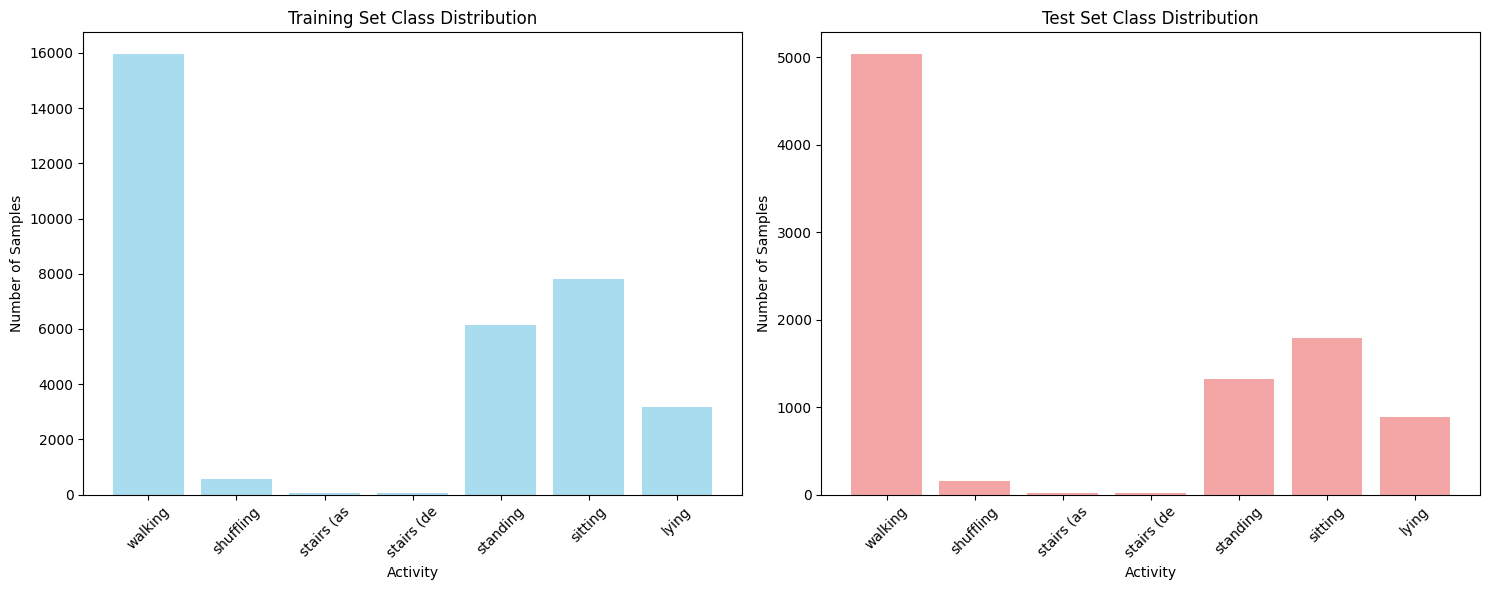


SAMPLING STRATEGY COMPARISON

Testing No Sampling...

Evaluating RF + No Sampling...
  Accuracy: 0.9196
  F1-Score (Weighted): 0.9143
  F1-Score (Macro): 0.5458
  Precision (Weighted): 0.9348
  Recall (Weighted): 0.9196
  ROC-AUC (Weighted): 0.9865
  Training time: 35.09s

Testing SMOTE...

Applying SMOTE sampling strategy...
Original distribution: {0: 15944, 1: 553, 2: 60, 3: 59, 4: 6151, 5: 7819, 6: 3164}
New distribution: {0: 15944, 1: 15944, 2: 15944, 3: 15944, 4: 15944, 5: 15944, 6: 15944}
Samples changed: 33750 -> 111608

Evaluating RF + SMOTE...
  Accuracy: 0.9194
  F1-Score (Weighted): 0.9180
  F1-Score (Macro): 0.6521
  Precision (Weighted): 0.9386
  Recall (Weighted): 0.9194
  ROC-AUC (Weighted): 0.9915
  Training time: 139.15s

Testing ADASYN...

Applying ADASYN sampling strategy...
Original distribution: {0: 15944, 1: 553, 2: 60, 3: 59, 4: 6151, 5: 7819, 6: 3164}
New distribution: {0: 15944, 1: 15921, 2: 15938, 3: 15951, 4: 15870, 5: 15946, 6: 15914}
Samples changed: 33750

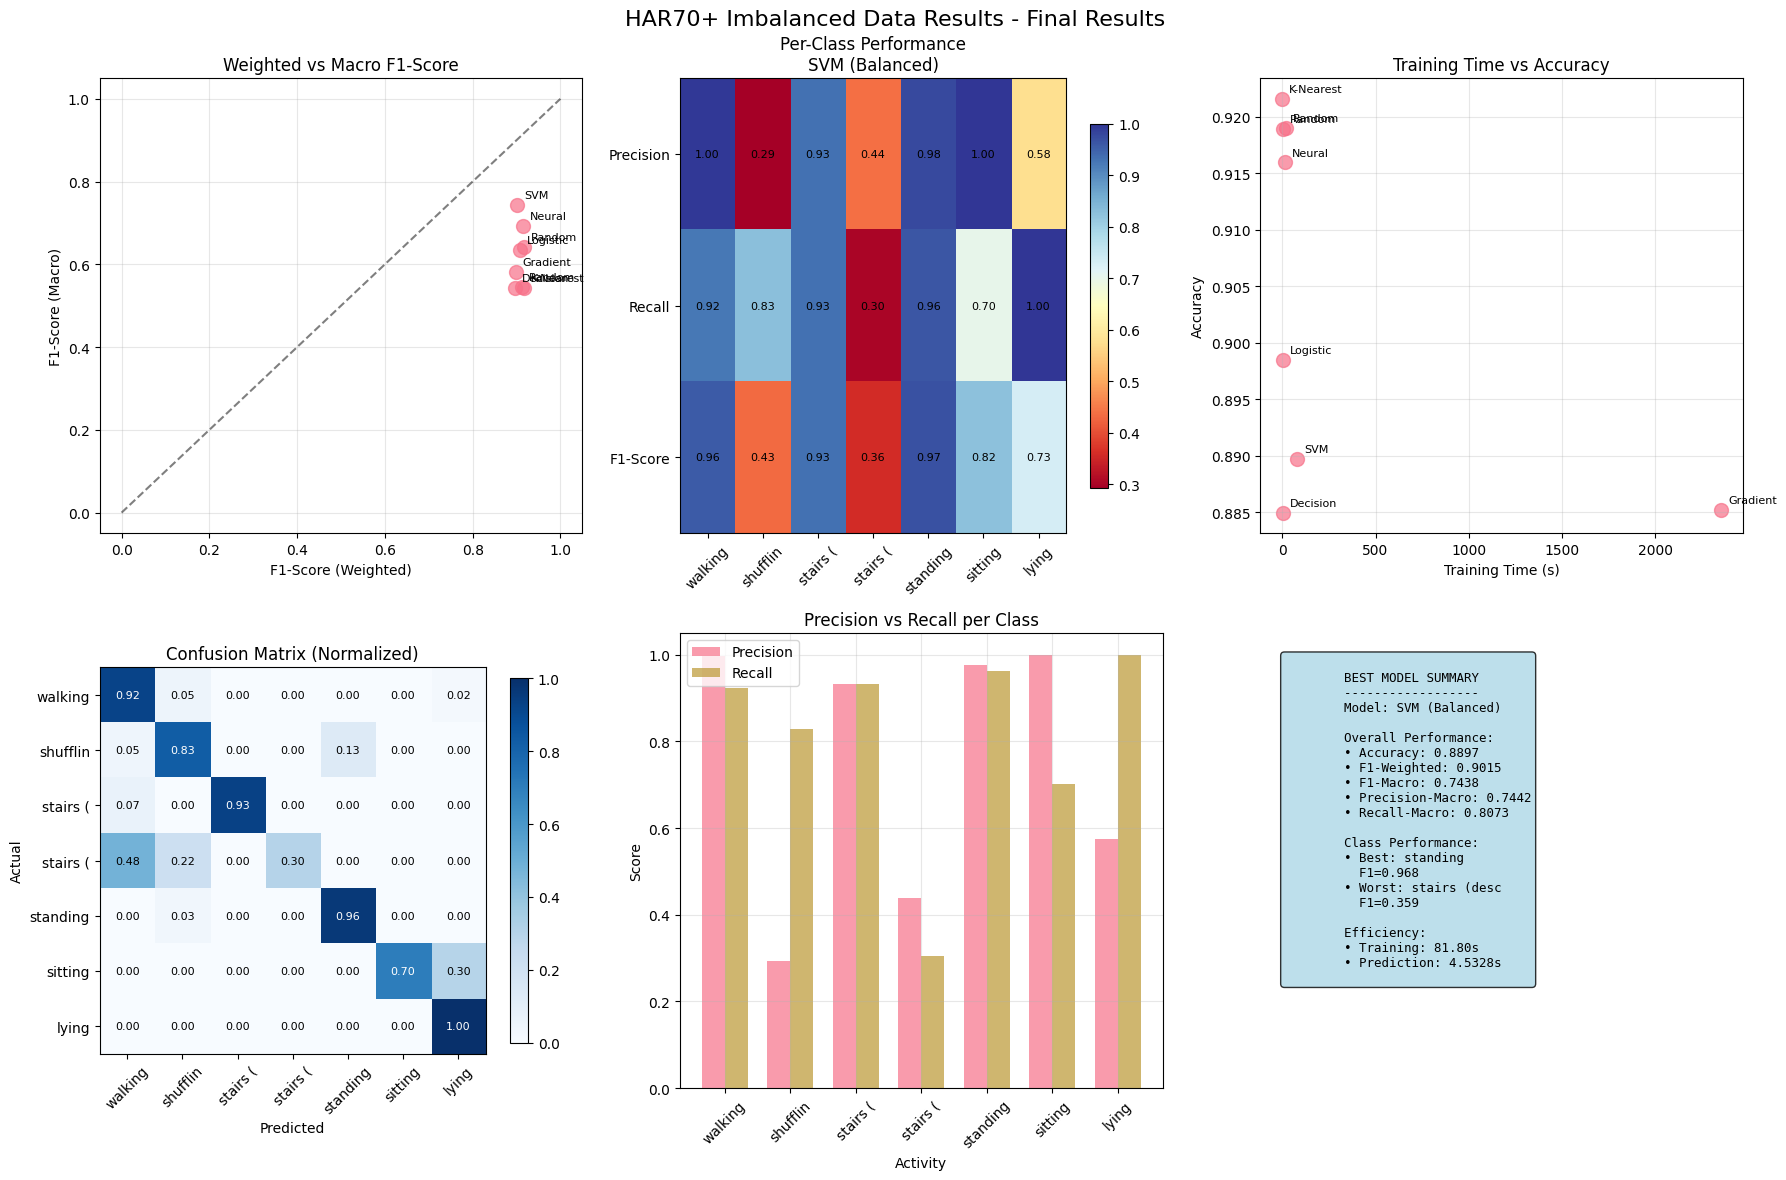

In [5]:
# HAR70+ Activity Recognition with Imbalanced Data Handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                           precision_recall_fscore_support, roc_auc_score, roc_curve,
                           f1_score, precision_score, recall_score)
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight

# Imbalanced learning libraries
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.metrics import classification_report_imbalanced

import time
import warnings
warnings.filterwarnings('ignore')

print("HAR70+ Activity Recognition with Imbalanced Data Handling")
print("=" * 70)

def analyze_class_distribution(y_train, y_test, label_encoder, activity_labels):
    """Analyze and visualize class distribution"""
    print("\nClass Distribution Analysis:")
    print("-" * 50)
    
    # Training set distribution
    train_dist = pd.Series(y_train).value_counts().sort_index()
    test_dist = pd.Series(y_test).value_counts().sort_index()
    
    print("Training Set Distribution:")
    total_train = len(y_train)
    for label, count in train_dist.items():
        original_label = label_encoder.inverse_transform([label])[0]
        activity_name = activity_labels.get(original_label, f"Unknown ({original_label})")
        print(f"  {activity_name}: {count} ({count/total_train*100:.1f}%)")
    
    print("\nTest Set Distribution:")
    total_test = len(y_test)
    for label, count in test_dist.items():
        original_label = label_encoder.inverse_transform([label])[0]
        activity_name = activity_labels.get(original_label, f"Unknown ({original_label})")
        print(f"  {activity_name}: {count} ({count/total_test*100:.1f}%)")
    
    # Calculate imbalance ratio
    max_class = train_dist.max()
    min_class = train_dist.min()
    imbalance_ratio = max_class / min_class
    
    print(f"\nImbalance Metrics:")
    print(f"  Imbalance Ratio: {imbalance_ratio:.2f}:1")
    print(f"  Majority Class: {max_class} samples")
    print(f"  Minority Class: {min_class} samples")
    
    # Visualize distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Training distribution
    activity_names = []
    for label in train_dist.index:
        original_label = label_encoder.inverse_transform([label])[0]
        activity_name = activity_labels.get(original_label, f"Unknown ({original_label})")
        activity_names.append(activity_name[:10])  # Truncate for display
    
    ax1.bar(activity_names, train_dist.values, alpha=0.7, color='skyblue')
    ax1.set_title('Training Set Class Distribution')
    ax1.set_xlabel('Activity')
    ax1.set_ylabel('Number of Samples')
    ax1.tick_params(axis='x', rotation=45)
    
    # Test distribution
    ax2.bar(activity_names, test_dist.values, alpha=0.7, color='lightcoral')
    ax2.set_title('Test Set Class Distribution')
    ax2.set_xlabel('Activity')
    ax2.set_ylabel('Number of Samples')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return imbalance_ratio

def apply_sampling_strategy(X_train, y_train, strategy='smote', random_state=42):
    """Apply different sampling strategies to handle imbalanced data"""
    print(f"\nApplying {strategy.upper()} sampling strategy...")
    
    original_distribution = pd.Series(y_train).value_counts().sort_index()
    print(f"Original distribution: {dict(original_distribution)}")
    
    if strategy == 'smote':
        sampler = SMOTE(random_state=random_state)
    elif strategy == 'adasyn':
        sampler = ADASYN(random_state=random_state)
    elif strategy == 'borderline_smote':
        sampler = BorderlineSMOTE(random_state=random_state)
    elif strategy == 'svm_smote':
        sampler = SVMSMOTE(random_state=random_state)
    elif strategy == 'smote_tomek':
        sampler = SMOTETomek(random_state=random_state)
    elif strategy == 'smote_enn':
        sampler = SMOTEENN(random_state=random_state)
    elif strategy == 'random_undersample':
        sampler = RandomUnderSampler(random_state=random_state)
    elif strategy == 'edited_nn':
        sampler = EditedNearestNeighbours()
    elif strategy == 'tomek_links':
        sampler = TomekLinks()
    else:
        raise ValueError(f"Unknown sampling strategy: {strategy}")
    
    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        
        new_distribution = pd.Series(y_resampled).value_counts().sort_index()
        print(f"New distribution: {dict(new_distribution)}")
        print(f"Samples changed: {len(X_train)} -> {len(X_resampled)}")
        
        return X_resampled, y_resampled, sampler
        
    except Exception as e:
        print(f"Error applying {strategy}: {str(e)}")
        return X_train, y_train, None

def create_balanced_models(random_state=42):
    """Create models with built-in class balancing"""
    models = {
        'Random Forest (Balanced)': RandomForestClassifier(
            n_estimators=200, 
            class_weight='balanced',
            random_state=random_state, 
            n_jobs=-1
        ),
        'Gradient Boosting (Balanced)': GradientBoostingClassifier(
            n_estimators=200,
            random_state=random_state
        ),
        'SVM (Balanced)': SVC(
            kernel='rbf',
            class_weight='balanced',
            random_state=random_state,
            probability=True
        ),
        'Logistic Regression (Balanced)': LogisticRegression(
            class_weight='balanced',
            random_state=random_state,
            max_iter=1000
        ),
        'Decision Tree (Balanced)': DecisionTreeClassifier(
            class_weight='balanced',
            random_state=random_state
        )
    }
    
    return models

def evaluate_model_comprehensive(model, X_train, X_test, y_train, y_test, model_name, 
                               activity_names, compute_detailed=True):
    """Comprehensive model evaluation with imbalanced data metrics"""
    print(f"\nEvaluating {model_name}...")
    
    # Training
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Predictions
    start_time = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start_time
    
    # Basic metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    # Weighted metrics (good for imbalanced data)
    precision_weighted = precision_score(y_test, y_pred, average='weighted')
    recall_weighted = recall_score(y_test, y_pred, average='weighted')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    
    # Macro metrics (treats all classes equally)
    precision_macro = precision_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    # Per-class metrics
    precision_per_class, recall_per_class, f1_per_class, support = \
        precision_recall_fscore_support(y_test, y_pred, average=None)
    
    # ROC AUC
    try:
        y_pred_proba = model.predict_proba(X_test)
        roc_auc_weighted = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
        roc_auc_macro = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
    except:
        y_pred_proba = None
        roc_auc_weighted = None
        roc_auc_macro = None
    
    results = {
        'model': model,
        'model_name': model_name,
        'accuracy': accuracy,
        'precision_weighted': precision_weighted,
        'recall_weighted': recall_weighted,
        'f1_weighted': f1_weighted,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'f1_macro': f1_macro,
        'precision_per_class': precision_per_class,
        'recall_per_class': recall_per_class,
        'f1_per_class': f1_per_class,
        'support': support,
        'roc_auc_weighted': roc_auc_weighted,
        'roc_auc_macro': roc_auc_macro,
        'train_time': train_time,
        'pred_time': pred_time,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    # Print metrics
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1-Score (Weighted): {f1_weighted:.4f}")
    print(f"  F1-Score (Macro): {f1_macro:.4f}")
    print(f"  Precision (Weighted): {precision_weighted:.4f}")
    print(f"  Recall (Weighted): {recall_weighted:.4f}")
    if roc_auc_weighted:
        print(f"  ROC-AUC (Weighted): {roc_auc_weighted:.4f}")
    print(f"  Training time: {train_time:.2f}s")
    
    if compute_detailed:
        print(f"\n  Per-Class Performance:")
        for i, activity in enumerate(activity_names):
            if i < len(precision_per_class):
                print(f"    {activity}: P={precision_per_class[i]:.3f}, "
                      f"R={recall_per_class[i]:.3f}, F1={f1_per_class[i]:.3f}, "
                      f"Support={support[i]}")
    
    return results

def compare_sampling_strategies(X_train, y_train, X_test, y_test, activity_names):
    """Compare different sampling strategies"""
    print("\n" + "="*70)
    print("SAMPLING STRATEGY COMPARISON")
    print("="*70)
    
    strategies = [
        ('baseline', 'No Sampling'),
        ('smote', 'SMOTE'),
        ('adasyn', 'ADASYN'),
        ('borderline_smote', 'Borderline SMOTE'),
        ('smote_tomek', 'SMOTE + Tomek Links'),
        ('smote_enn', 'SMOTE + ENN')
    ]
    
    # Use a simple, fast model for comparison
    base_model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    strategy_results = []
    
    for strategy_key, strategy_name in strategies:
        print(f"\nTesting {strategy_name}...")
        
        if strategy_key == 'baseline':
            X_train_balanced = X_train
            y_train_balanced = y_train
        else:
            try:
                X_train_balanced, y_train_balanced, _ = apply_sampling_strategy(
                    X_train, y_train, strategy_key
                )
            except Exception as e:
                print(f"Failed to apply {strategy_name}: {str(e)}")
                continue
        
        # Train and evaluate model
        model = base_model
        results = evaluate_model_comprehensive(
            model, X_train_balanced, X_test, y_train_balanced, y_test,
            f"RF + {strategy_name}", activity_names, compute_detailed=False
        )
        
        strategy_results.append({
            'strategy': strategy_name,
            'strategy_key': strategy_key,
            'accuracy': results['accuracy'],
            'f1_weighted': results['f1_weighted'],
            'f1_macro': results['f1_macro'],
            'precision_macro': results['precision_macro'],
            'recall_macro': results['recall_macro'],
            'train_samples': len(X_train_balanced),
            'results': results
        })
    
    # Create comparison DataFrame
    comparison_df = pd.DataFrame([
        {
            'Strategy': r['strategy'],
            'Accuracy': r['accuracy'],
            'F1-Weighted': r['f1_weighted'],
            'F1-Macro': r['f1_macro'],
            'Precision-Macro': r['precision_macro'],
            'Recall-Macro': r['recall_macro'],
            'Train Samples': r['train_samples']
        }
        for r in strategy_results
    ])
    
    print(f"\n{strategy_name} Strategy Comparison:")
    print("-" * 50)
    print(comparison_df.to_string(index=False))
    
    # Find best strategy based on macro F1-score (better for imbalanced data)
    best_strategy = max(strategy_results, key=lambda x: x['f1_macro'])
    print(f"\nBest Strategy: {best_strategy['strategy']}")
    print(f"Best Macro F1-Score: {best_strategy['f1_macro']:.4f}")
    
    return strategy_results, best_strategy

def plot_imbalanced_results(results_list, activity_names, title_suffix=""):
    """Create comprehensive visualization for imbalanced data results"""
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'HAR70+ Imbalanced Data Results {title_suffix}', fontsize=16)
    
    # 1. Model comparison (F1-Macro vs F1-Weighted)
    ax1 = axes[0, 0]
    f1_weighted = [r['f1_weighted'] for r in results_list]
    f1_macro = [r['f1_macro'] for r in results_list]
    model_names = [r['model_name'] for r in results_list]
    
    ax1.scatter(f1_weighted, f1_macro, s=100, alpha=0.7)
    for i, name in enumerate(model_names):
        ax1.annotate(name.split()[0], (f1_weighted[i], f1_macro[i]), 
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    ax1.set_xlabel('F1-Score (Weighted)')
    ax1.set_ylabel('F1-Score (Macro)')
    ax1.set_title('Weighted vs Macro F1-Score')
    ax1.grid(True, alpha=0.3)
    ax1.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    
    # 2. Per-class performance heatmap
    ax2 = axes[0, 1]
    if len(results_list) > 0:
        best_result = max(results_list, key=lambda x: x['f1_macro'])
        per_class_metrics = np.array([
            best_result['precision_per_class'],
            best_result['recall_per_class'],
            best_result['f1_per_class']
        ])
        
        im = ax2.imshow(per_class_metrics, cmap='RdYlBu', aspect='auto')
        ax2.set_xticks(range(len(activity_names)))
        ax2.set_xticklabels([name[:8] for name in activity_names], rotation=45)
        ax2.set_yticks(range(3))
        ax2.set_yticklabels(['Precision', 'Recall', 'F1-Score'])
        ax2.set_title(f'Per-Class Performance\n{best_result["model_name"]}')
        
        # Add text annotations
        for i in range(3):
            for j in range(len(activity_names)):
                if j < len(per_class_metrics[i]):
                    ax2.text(j, i, f'{per_class_metrics[i][j]:.2f}', 
                            ha='center', va='center', fontsize=8)
        
        plt.colorbar(im, ax=ax2, shrink=0.8)
    
    # 3. Training time vs Performance
    ax3 = axes[0, 2]
    train_times = [r['train_time'] for r in results_list]
    accuracies = [r['accuracy'] for r in results_list]
    
    ax3.scatter(train_times, accuracies, s=100, alpha=0.7)
    for i, name in enumerate(model_names):
        ax3.annotate(name.split()[0], (train_times[i], accuracies[i]), 
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    ax3.set_xlabel('Training Time (s)')
    ax3.set_ylabel('Accuracy')
    ax3.set_title('Training Time vs Accuracy')
    ax3.grid(True, alpha=0.3)
    
    # 4. Confusion matrix of best model
    ax4 = axes[1, 0]
    if len(results_list) > 0:
        best_result = max(results_list, key=lambda x: x['f1_macro'])
        cm = confusion_matrix(y_test, best_result['y_pred'], normalize='true')
        
        im = ax4.imshow(cm, cmap='Blues')
        ax4.set_xticks(range(len(activity_names)))
        ax4.set_yticks(range(len(activity_names)))
        ax4.set_xticklabels([name[:8] for name in activity_names], rotation=45)
        ax4.set_yticklabels([name[:8] for name in activity_names])
        ax4.set_title('Confusion Matrix (Normalized)')
        ax4.set_xlabel('Predicted')
        ax4.set_ylabel('Actual')
        
        # Add text annotations
        for i in range(len(activity_names)):
            for j in range(len(activity_names)):
                if i < cm.shape[0] and j < cm.shape[1]:
                    ax4.text(j, i, f'{cm[i, j]:.2f}', 
                            ha='center', va='center', fontsize=8,
                            color='white' if cm[i, j] > 0.5 else 'black')
        
        plt.colorbar(im, ax=ax4, shrink=0.8)
    
    # 5. Precision-Recall per class
    ax5 = axes[1, 1]
    if len(results_list) > 0:
        best_result = max(results_list, key=lambda x: x['f1_macro'])
        precision_per_class = best_result['precision_per_class']
        recall_per_class = best_result['recall_per_class']
        
        x = np.arange(len(activity_names))
        width = 0.35
        
        ax5.bar(x - width/2, precision_per_class, width, label='Precision', alpha=0.7)
        ax5.bar(x + width/2, recall_per_class, width, label='Recall', alpha=0.7)
        
        ax5.set_xlabel('Activity')
        ax5.set_ylabel('Score')
        ax5.set_title('Precision vs Recall per Class')
        ax5.set_xticks(x)
        ax5.set_xticklabels([name[:8] for name in activity_names], rotation=45)
        ax5.legend()
        ax5.grid(True, alpha=0.3)
    
    # 6. Model summary
    ax6 = axes[1, 2]
    ax6.axis('off')
    
    if len(results_list) > 0:
        best_result = max(results_list, key=lambda x: x['f1_macro'])
        
        # Find worst performing class
        worst_class_idx = np.argmin(best_result['f1_per_class'])
        best_class_idx = np.argmax(best_result['f1_per_class'])
        
        summary_text = f"""
        BEST MODEL SUMMARY
        ------------------
        Model: {best_result['model_name']}
        
        Overall Performance:
        • Accuracy: {best_result['accuracy']:.4f}
        • F1-Weighted: {best_result['f1_weighted']:.4f}
        • F1-Macro: {best_result['f1_macro']:.4f}
        • Precision-Macro: {best_result['precision_macro']:.4f}
        • Recall-Macro: {best_result['recall_macro']:.4f}
        
        Class Performance:
        • Best: {activity_names[best_class_idx][:12]}
          F1={best_result['f1_per_class'][best_class_idx]:.3f}
        • Worst: {activity_names[worst_class_idx][:12]}
          F1={best_result['f1_per_class'][worst_class_idx]:.3f}
        
        Efficiency:
        • Training: {best_result['train_time']:.2f}s
        • Prediction: {best_result['pred_time']:.4f}s
        """
        
        ax6.text(0.05, 0.95, summary_text, transform=ax6.transAxes, fontsize=9,
                verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))
    
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Check if required variables are available
    if 'X_train_scaled' in locals() and 'X_test_scaled' in locals():
        print("Found preprocessed data. Starting imbalanced data modeling pipeline...")
        
        # Activity label mapping
        activity_labels = {
            1: 'walking',
            3: 'shuffling', 
            4: 'stairs (ascending)',
            5: 'stairs (descending)',
            6: 'standing',
            7: 'sitting',
            8: 'lying'
        }
        
        # Get activity names for display
        unique_labels = np.unique(y_test)
        activity_names = []
        for label in unique_labels:
            original_label = label_encoder.inverse_transform([label])[0]
            activity_name = activity_labels.get(original_label, f"Unknown ({original_label})")
            activity_names.append(activity_name)
        
        # Analyze class distribution
        imbalance_ratio = analyze_class_distribution(y_train, y_test, label_encoder, activity_labels)
        
        # Compare sampling strategies
        strategy_results, best_strategy = compare_sampling_strategies(
            X_train_scaled, y_train, X_test_scaled, y_test, activity_names
        )
        
        # Apply best sampling strategy
        print(f"\nApplying best sampling strategy: {best_strategy['strategy']}")
        if best_strategy['strategy_key'] != 'baseline':
            X_train_balanced, y_train_balanced, best_sampler = apply_sampling_strategy(
                X_train_scaled, y_train, best_strategy['strategy_key']
            )
        else:
            X_train_balanced = X_train_scaled
            y_train_balanced = y_train
            best_sampler = None
        
        # Create and evaluate models with balanced data
        print("\n" + "="*70)
        print("COMPREHENSIVE MODEL EVALUATION WITH BALANCED DATA")
        print("="*70)
        
        # Models with built-in balancing
        balanced_models = create_balanced_models()
        
        # Add some additional models
        balanced_models.update({
            'Random Forest (SMOTE)': RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
            'Neural Network (Balanced)': MLPClassifier(hidden_layer_sizes=(100, 50), 
                                                      random_state=42, max_iter=500),
            'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
        })
        
        # Evaluate all models
        results_list = []
        for name, model in balanced_models.items():
            if 'SMOTE' in name:
                # Use SMOTE-balanced data
                X_train_use = X_train_balanced
                y_train_use = y_train_balanced
            else:
                # Use original data (model handles balancing internally)
                X_train_use = X_train_scaled
                y_train_use = y_train
            
            results = evaluate_model_comprehensive(
                model, X_train_use, X_test_scaled, y_train_use, y_test,
                name, activity_names
            )
            results_list.append(results)
        
        # Create comprehensive results summary
        results_df = pd.DataFrame([
            {
                'Model': r['model_name'],
                'Accuracy': r['accuracy'],
                'F1-Weighted': r['f1_weighted'],
                'F1-Macro': r['f1_macro'],
                'Precision-Macro': r['precision_macro'],
                'Recall-Macro': r['recall_macro'],
                'ROC-AUC': r['roc_auc_weighted'] if r['roc_auc_weighted'] else 'N/A',
                'Train Time (s)': r['train_time'],
                'Pred Time (s)': r['pred_time']
            }
            for r in results_list
        ])
        
        print("\n" + "="*70)
        print("COMPREHENSIVE RESULTS SUMMARY")
        print("="*70)
        print(results_df.to_string(index=False))
        
        # Find best models
        best_macro_f1 = max(results_list, key=lambda x: x['f1_macro'])
        best_weighted_f1 = max(results_list, key=lambda x: x['f1_weighted'])
        best_accuracy = max(results_list, key=lambda x: x['accuracy'])
        
        print(f"\nBest Models:")
        print(f"  Macro F1-Score: {best_macro_f1['model_name']} ({best_macro_f1['f1_macro']:.4f})")
        print(f"  Weighted F1-Score: {best_weighted_f1['model_name']} ({best_weighted_f1['f1_weighted']:.4f})")
        print(f"  Accuracy: {best_accuracy['model_name']} ({best_accuracy['accuracy']:.4f})")
        
        # Detailed analysis of best model (using macro F1 as it's better for imbalanced data)
        print(f"\n" + "="*70)
        print(f"DETAILED ANALYSIS - {best_macro_f1['model_name']}")
        print("="*70)
        
        best_model = best_macro_f1['model']
        y_pred_best = best_macro_f1['y_pred']
        
        # Imbalanced classification report
        print("\nImbalanced Classification Report:")
        print("-" * 50)
        try:
            print(classification_report_imbalanced(y_test, y_pred_best, target_names=activity_names))
        except:
            print(classification_report(y_test, y_pred_best, target_names=activity_names))
        
        # Create comprehensive visualizations
        plot_imbalanced_results(results_list, activity_names, "- Final Results")